In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:/Users/ranja/Downloads/train(1).csv')
test = pd.read_csv('C:/Users/ranja/Downloads/test(1).csv')

In [3]:
# Printing the Training set
print(train)
 
# Checking the dimensions of this dataset
print(train.shape)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [4]:
print(f"Train set shape: {train.shape} \n")

Train set shape: (1460, 81) 



In [5]:
print(f"Test set shape: {test.shape} \n")

Test set shape: (1459, 80) 



In [6]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in train.columns if x not in test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in test.columns if x not in train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [11]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df_1 = pd.merge(train,test, how='inner', on='LotArea')

In [13]:
df_1.head()

Id_x  MSSubClass_x MSZoning_x  LotFrontage_x  LotArea Street_x Alley_x  \
0     1            60         RL           65.0     8450     Pave     NaN   
1     1            60         RL           65.0     8450     Pave     NaN   
2     1            60         RL           65.0     8450     Pave     NaN   
3   217            20         RL           65.0     8450     Pave     NaN   
4   217            20         RL           65.0     8450     Pave     NaN   

  LotShape_x LandContour_x Utilities_x  ... ScreenPorch_y PoolArea_y PoolQC_y  \
0        Reg           Lvl      AllPub  ...             0          0      NaN   
1        Reg           Lvl      AllPub  ...             0          0      NaN   
2        Reg           Lvl      AllPub  ...             0          0      NaN   
3        Reg           Lvl      AllPub  ...             0          0      NaN   
4        Reg           Lvl      AllPub  ...             0          0      NaN   

  Fence_y MiscFeature_y MiscVal_y MoSold_y  YrSold_y  SaleType_y  \
0     NaN           NaN         0        9      2008          WD   
1     NaN           NaN         0        4      2008          WD   
2   MnPrv           NaN         0       11      2006         COD   
3     NaN           NaN         0        9      2008          WD   
4     NaN           NaN         0        4      2008          WD   

   SaleCondition_y  
0           Normal  
1           Normal  
2           Normal  
3           Normal  
4           Normal  

[5 rows x 160 columns]

In [14]:
df_1.pivot_table(index = 'LotArea')

1stFlrSF_x  1stFlrSF_y  2ndFlrSF_x  2ndFlrSF_y  3SsnPorch_x  \
LotArea                                                                
1477          630.0     546.000         0.0     546.000          0.0   
1526          630.0     546.000         0.0     546.000          0.0   
1533          714.0     538.000       273.0     504.000          0.0   
1596          526.0     526.000       462.0     462.000          0.0   
1680          554.4     511.875       552.3     535.875          0.0   
...             ...         ...         ...         ...          ...   
16659        1468.0    1582.000       795.0     570.000          0.0   
16770        1195.0    1712.000       644.0       0.000          0.0   
17500        1902.0    1906.000         0.0       0.000          0.0   
17871        1724.0    1680.000         0.0       0.000          0.0   
21780        1163.0     875.000       511.0     305.000          0.0   

         3SsnPorch_y  BedroomAbvGr_x  BedroomAbvGr_y  BsmtFinSF1_x  \
LotArea                                                              
1477             0.0             1.0           3.000         509.0   
1526             0.0             1.0           3.000         515.0   
1533             0.0             2.0           2.500         276.5   
1596           120.0             2.0           1.000         462.0   
1680             0.0             2.5           2.375         178.5   
...              ...             ...             ...           ...   
16659            0.0             3.0           3.000         795.0   
16770            0.0             4.0           3.000           0.0   
17500            0.0             3.0           3.000        1406.0   
17871            0.0             3.0           4.000         528.0   
21780            0.0             4.0           2.000           0.0   

         BsmtFinSF1_y  ...  TotalBsmtSF_x  TotalBsmtSF_y  WoodDeckSF_x  \
LotArea                ...                                               
1477           358.00  ...          630.0        546.000           0.0   
1526             0.00  ...          630.0        546.000           0.0   
1533           455.50  ...          588.0        538.000           0.0   
1596           437.00  ...          462.0        462.000         120.0   
1680           285.75  ...          554.4        511.875          63.6   
...               ...  ...            ...            ...           ...   
16659            0.00  ...          795.0       1582.000           0.0   
16770         1196.00  ...         1195.0       1712.000           0.0   
17500          784.00  ...         1902.0       1310.000           0.0   
17871            0.00  ...         1680.0       1680.000           0.0   
21780            0.00  ...         1163.0        408.500          72.0   

         WoodDeckSF_y  YearBuilt_x  YearBuilt_y  YearRemodAdd_x  \
LotArea                                                           
1477          187.000       1970.0       1970.0          1970.0   
1526            0.000       1970.0       1970.0          2002.0   
1533           56.000       1970.0       1970.0          1989.0   
1596            0.000       1973.0       1973.0          1973.0   
1680           84.875       1971.6       1972.0          1975.1   
...               ...          ...          ...             ...   
16659           0.000       1977.0       2007.0          1994.0   
16770         218.000       1998.0       2002.0          1998.0   
17500           0.000       1959.0       1954.0          2002.0   
17871         152.000       1967.0       1995.0          1976.0   
21780          59.500       1918.0       1915.0          1950.0   

         YearRemodAdd_y  YrSold_x  YrSold_y  
LotArea                                      
1477             2007.0    2009.0   2008.00  
1526             1970.0    2009.0   2006.00  
1533             1970.0    2007.5   2006.50  
1596             1973.0    2009.0   2008.00  
1680             1972.0    2007.9   2008.25  
... 

In [15]:
#Using pandas.pivot_table
pd.pivot_table(df_1, index = 'LotArea')

1stFlrSF_x  1stFlrSF_y  2ndFlrSF_x  2ndFlrSF_y  3SsnPorch_x  \
LotArea                                                                
1477          630.0     546.000         0.0     546.000          0.0   
1526          630.0     546.000         0.0     546.000          0.0   
1533          714.0     538.000       273.0     504.000          0.0   
1596          526.0     526.000       462.0     462.000          0.0   
1680          554.4     511.875       552.3     535.875          0.0   
...             ...         ...         ...         ...          ...   
16659        1468.0    1582.000       795.0     570.000          0.0   
16770        1195.0    1712.000       644.0       0.000          0.0   
17500        1902.0    1906.000         0.0       0.000          0.0   
17871        1724.0    1680.000         0.0       0.000          0.0   
21780        1163.0     875.000       511.0     305.000          0.0   

         3SsnPorch_y  BedroomAbvGr_x  BedroomAbvGr_y  BsmtFinSF1_x  \
LotArea                                                              
1477             0.0             1.0           3.000         509.0   
1526             0.0             1.0           3.000         515.0   
1533             0.0             2.0           2.500         276.5   
1596           120.0             2.0           1.000         462.0   
1680             0.0             2.5           2.375         178.5   
...              ...             ...             ...           ...   
16659            0.0             3.0           3.000         795.0   
16770            0.0             4.0           3.000           0.0   
17500            0.0             3.0           3.000        1406.0   
17871            0.0             3.0           4.000         528.0   
21780            0.0             4.0           2.000           0.0   

         BsmtFinSF1_y  ...  TotalBsmtSF_x  TotalBsmtSF_y  WoodDeckSF_x  \
LotArea                ...                                               
1477           358.00  ...          630.0        546.000           0.0   
1526             0.00  ...          630.0        546.000           0.0   
1533           455.50  ...          588.0        538.000           0.0   
1596           437.00  ...          462.0        462.000         120.0   
1680           285.75  ...          554.4        511.875          63.6   
...               ...  ...            ...            ...           ...   
16659            0.00  ...          795.0       1582.000           0.0   
16770         1196.00  ...         1195.0       1712.000           0.0   
17500          784.00  ...         1902.0       1310.000           0.0   
17871            0.00  ...         1680.0       1680.000           0.0   
21780            0.00  ...         1163.0        408.500          72.0   

         WoodDeckSF_y  YearBuilt_x  YearBuilt_y  YearRemodAdd_x  \
LotArea                                                           
1477          187.000       1970.0       1970.0          1970.0   
1526            0.000       1970.0       1970.0          2002.0   
1533           56.000       1970.0       1970.0          1989.0   
1596            0.000       1973.0       1973.0          1973.0   
1680           84.875       1971.6       1972.0          1975.1   
...               ...          ...          ...             ...   
16659           0.000       1977.0       2007.0          1994.0   
16770         218.000       1998.0       2002.0          1998.0   
17500           0.000       1959.0       1954.0          2002.0   
17871         152.000       1967.0       1995.0          1976.0   
21780          59.500       1918.0       1915.0          1950.0   

         YearRemodAdd_y  YrSold_x  YrSold_y  
LotArea                                      
1477             2007.0    2009.0   2008.00  
1526             1970.0    2009.0   2006.00  
1533             1970.0    2007.5   2006.50  
1596             1973.0    2009.0   2008.00  
1680             1972.0    2007.9   2008.25  
... 

In [16]:
#Single value
df_1.pivot_table(values = 'SalePrice', index = 'LotArea')

SalePrice
LotArea           
1477       80000.0
1526       86000.0
1533       94500.0
1596       91000.0
1680      101640.0
...            ...
16659     235000.0
16770     221000.0
17500     335000.0
17871     197900.0
21780     185000.0

[228 rows x 1 columns]

In [17]:
# categorized data type based on unique value
import pprint
from IPython.display import display, HTML

def categorize_columns(df):
    categorical = []
    numerical = []

    columns = list(df.columns)

    for col in columns:
        length = len(df[col].unique())
        if (length > 1 and length < 26):
            categorical.append(col)
            df[col] = df[col].astype("category")
        else:
            numerical.append(col)

    return categorical, numerical

categorical, numerical = categorize_columns(df_1)

pprint.pprint(categorical, compact=True)
print("\n Length of categorical list: {} \n".format(len(categorical)))
pprint.pprint(numerical, compact=True)
print("\n Length of numerical list: {}".format(len(numerical)))

# scrollable table
def create_scrollable_table(df, title):
    # Convert the summary statistics to an HTML table
    html_table = df.to_html()
    # Wrap the HTML table inside a scrollable div
    scrollable_html_table = f'<h3>{title}</h3><div style="height: 200px; overflow-y: scroll;">{html_table}</div>'
    # Return the scrollable HTML table
    return scrollable_html_table

# numerical features' summary statistics
numerical_features = df_1.select_dtypes(include=[np.number])
summary_stats_numerical = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats_numerical,'Summary statistics for numerical features')
display(HTML(html_numerical))

['MSSubClass_x', 'MSZoning_x', 'Street_x', 'Alley_x', 'LotShape_x',
 'LandContour_x', 'LotConfig_x', 'LandSlope_x', 'Neighborhood_x',
 'Condition1_x', 'Condition2_x', 'BldgType_x', 'HouseStyle_x', 'OverallQual_x',
 'OverallCond_x', 'RoofStyle_x', 'RoofMatl_x', 'Exterior1st_x', 'Exterior2nd_x',
 'MasVnrType_x', 'ExterQual_x', 'ExterCond_x', 'Foundation_x', 'BsmtQual_x',
 'BsmtCond_x', 'BsmtExposure_x', 'BsmtFinType1_x', 'BsmtFinType2_x',
 'Heating_x', 'HeatingQC_x', 'CentralAir_x', 'Electrical_x', 'LowQualFinSF_x',
 'BsmtFullBath_x', 'BsmtHalfBath_x', 'FullBath_x', 'HalfBath_x',
 'BedroomAbvGr_x', 'KitchenAbvGr_x', 'KitchenQual_x', 'TotRmsAbvGrd_x',
 'Functional_x', 'Fireplaces_x', 'FireplaceQu_x', 'GarageType_x',
 'GarageFinish_x', 'GarageCars_x', 'GarageQual_x', 'GarageCond_x',
 'PavedDrive_x', '3SsnPorch_x', 'PoolArea_x', 'PoolQC_x', 'Fence_x',
 'MiscFeature_x', 'MiscVal_x', 'MoSold_x', 'YrSold_x', 'SaleType_x',
 'SaleCondition_x', 'MSSubClass_y', 'MSZoning_y', 'Street_y', 'Alley_y',

In [18]:
# categorical features' summary statistics
categorical_features = df_1.select_dtypes(include=['object', 'category'])
summary_stats_categorical = categorical_features.describe().T
html_categorical = create_scrollable_table(summary_stats_categorical, 'Summary statistics for categorical features')
display(HTML(html_categorical))

In [19]:
# null values
missing_values = (df_1.isnull().sum())
missing_values_filtered = missing_values[missing_values > 0]
missing_values_filtered

LotFrontage_x      156
Alley_x           2544
MasVnrType_x         5
MasVnrArea_x         5
BsmtQual_x         146
BsmtCond_x         146
BsmtExposure_x     146
BsmtFinType1_x     146
BsmtFinType2_x     146
FireplaceQu_x     1774
GarageType_x       198
GarageYrBlt_x      198
GarageFinish_x     198
GarageQual_x       198
GarageCond_x       198
PoolQC_x          2910
Fence_x           2258
MiscFeature_x     2823
MSZoning_y           1
LotFrontage_y      134
Alley_y           2567
Utilities_y          1
MasVnrType_y        17
MasVnrArea_y        17
BsmtQual_y          88
BsmtCond_y          88
BsmtExposure_y      88
BsmtFinType1_y      88
BsmtFinType2_y      88
Functional_y         1
FireplaceQu_y     1923
GarageType_y       196
GarageYrBlt_y      198
GarageFinish_y     198
GarageCars_y         2
GarageArea_y         2
GarageQual_y       198
GarageCond_y       198
PoolQC_y          2912
Fence_y           2259
MiscFeature_y     2805
dtype: int64

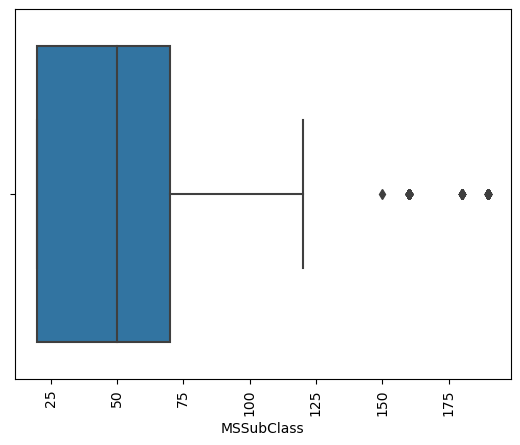

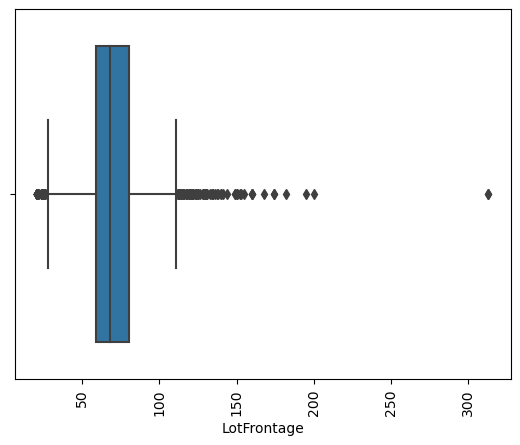

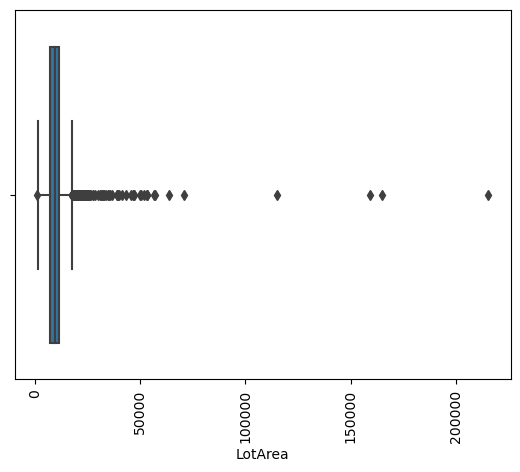

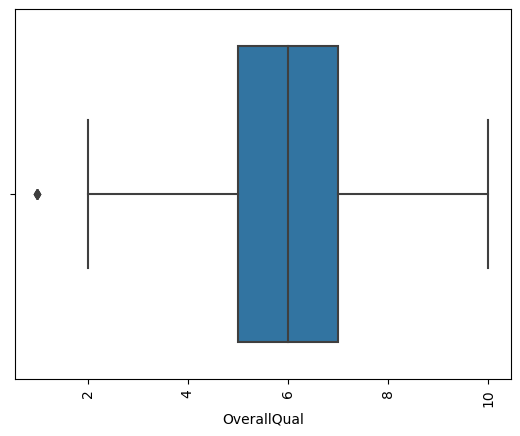

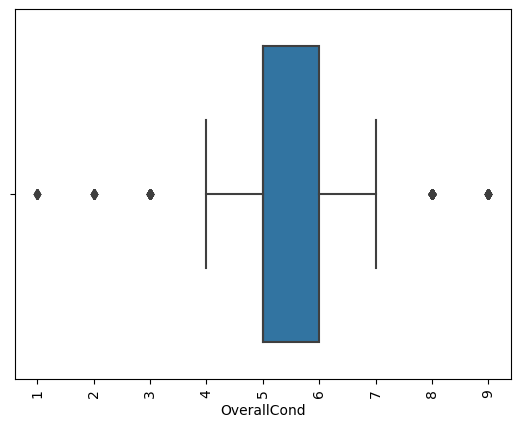

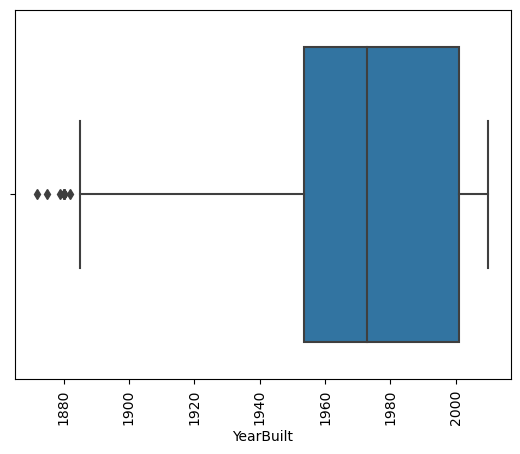

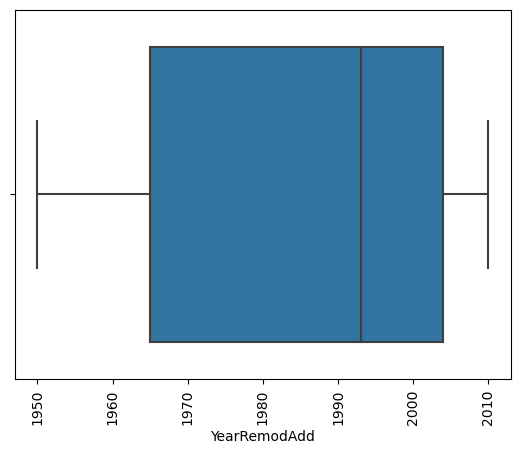

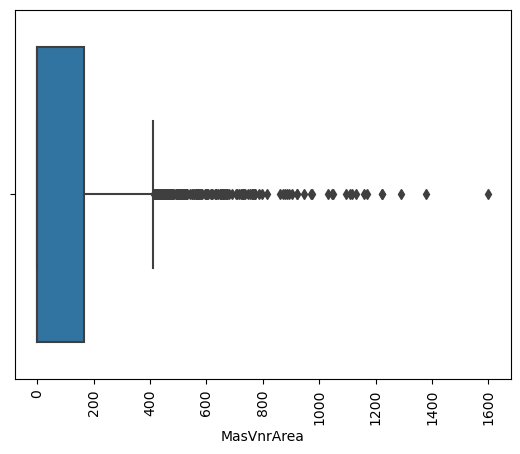

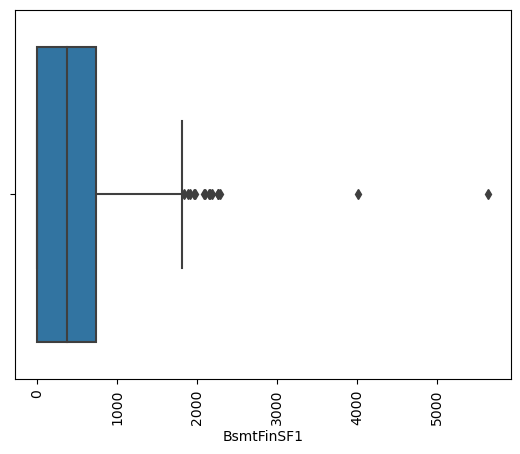

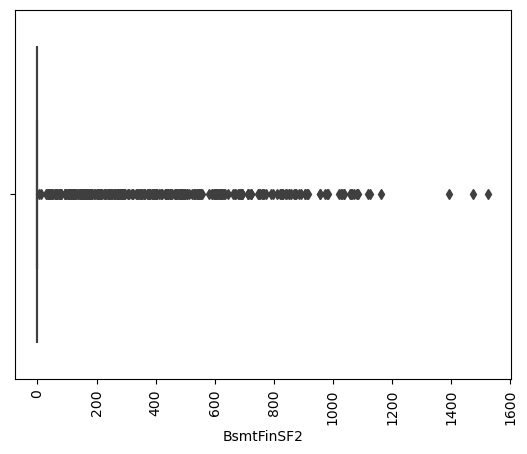

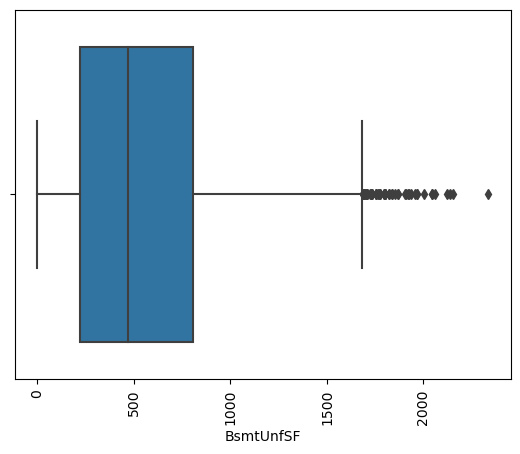

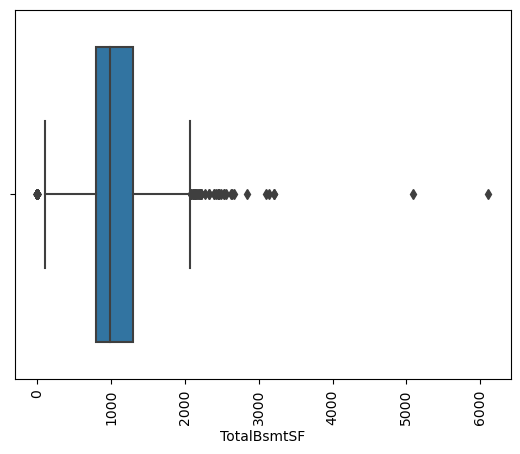

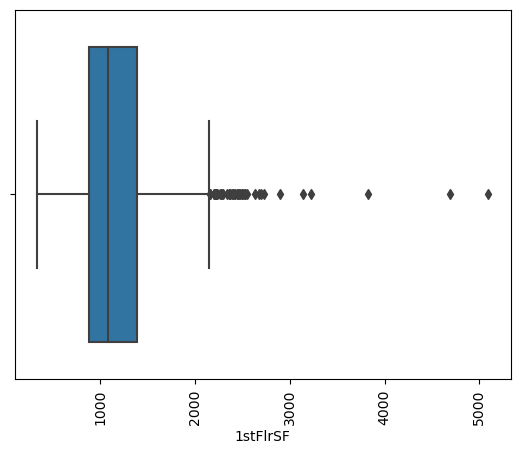

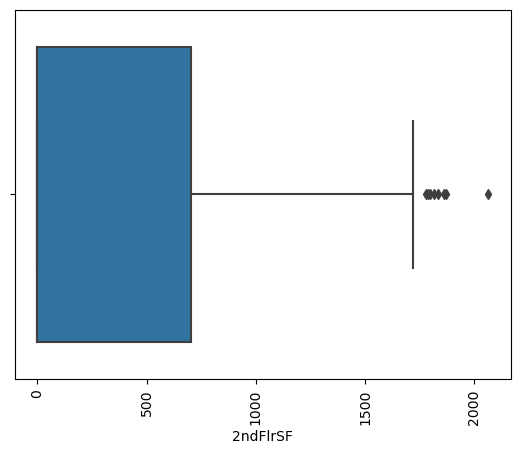

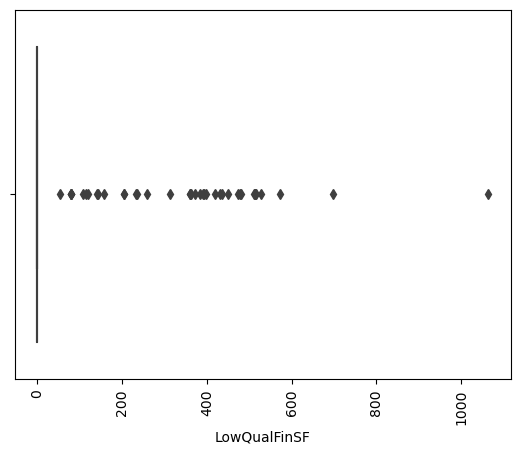

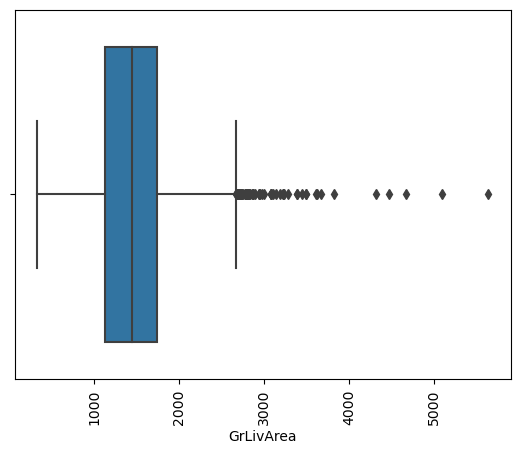

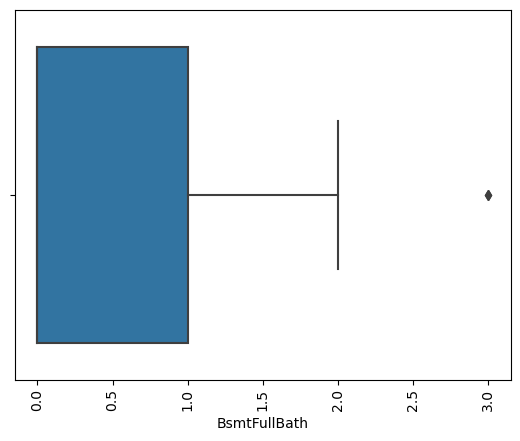

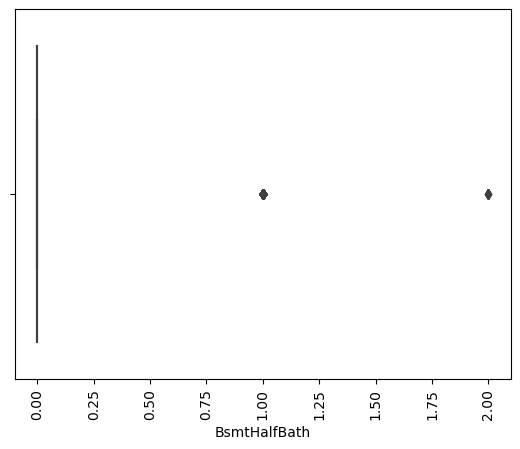

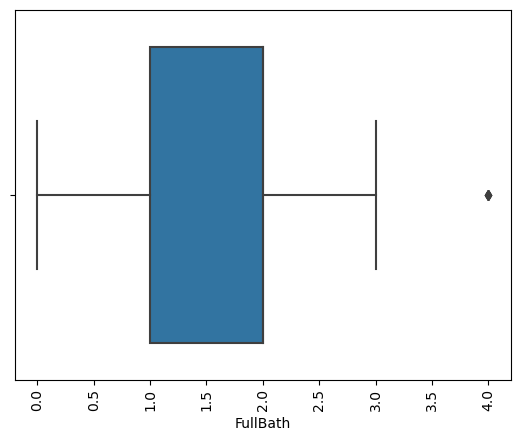

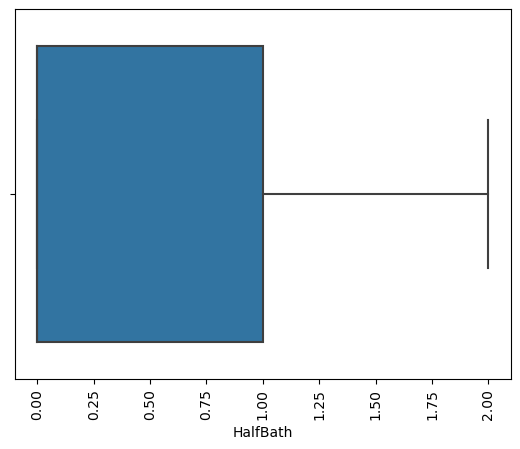

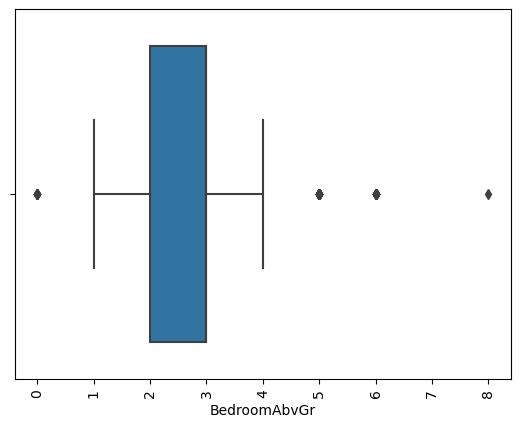

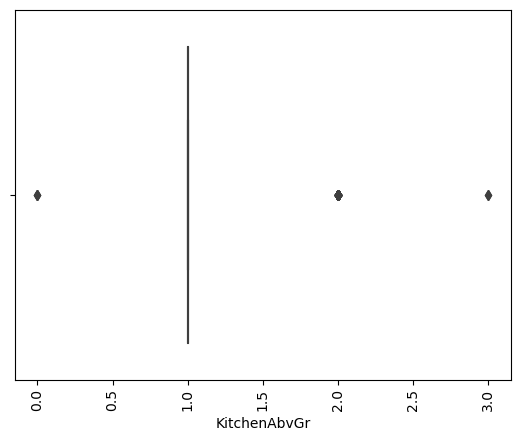

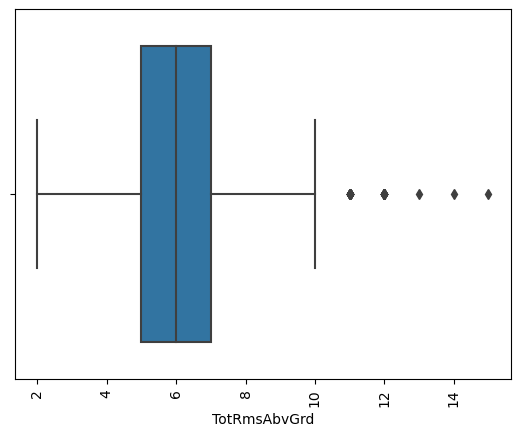

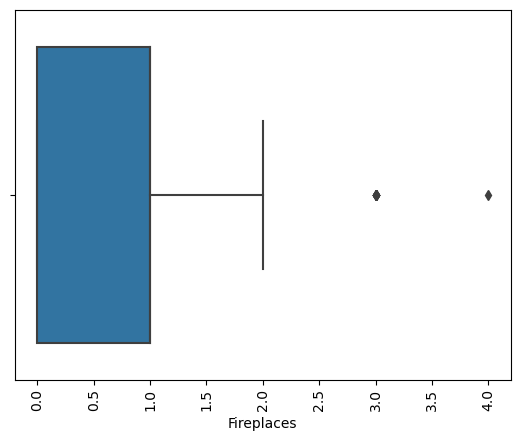

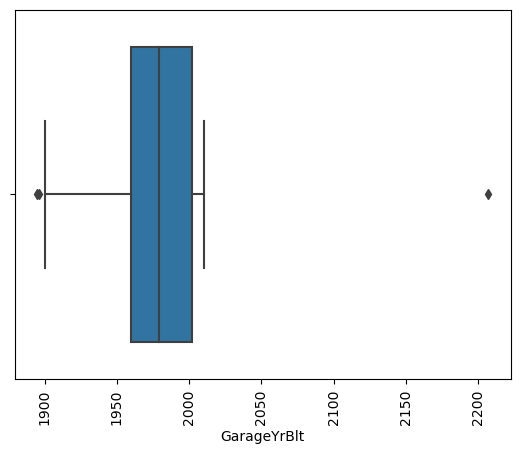

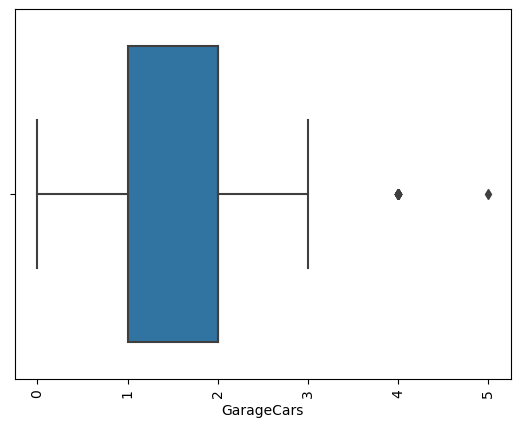

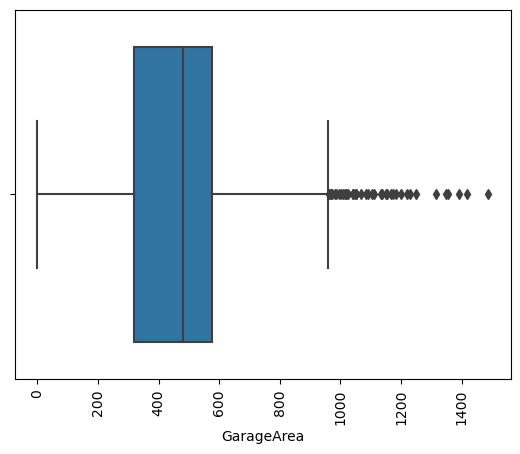

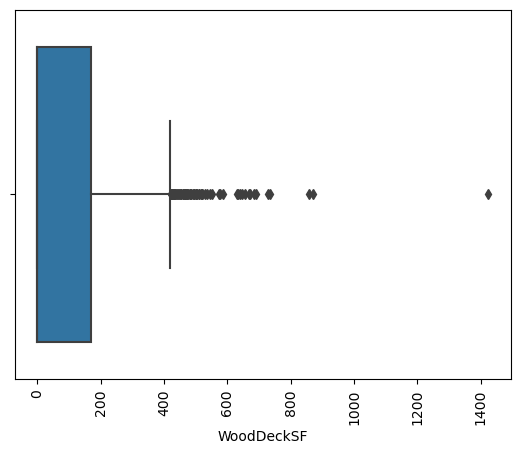

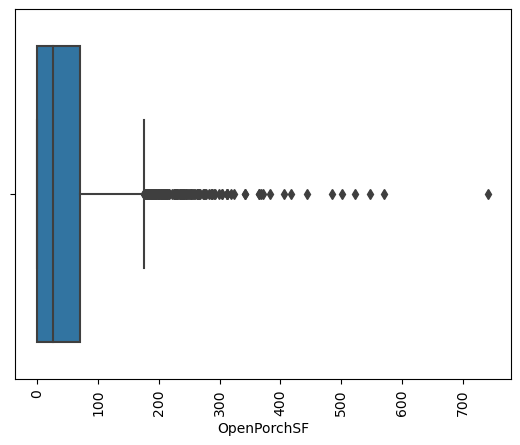

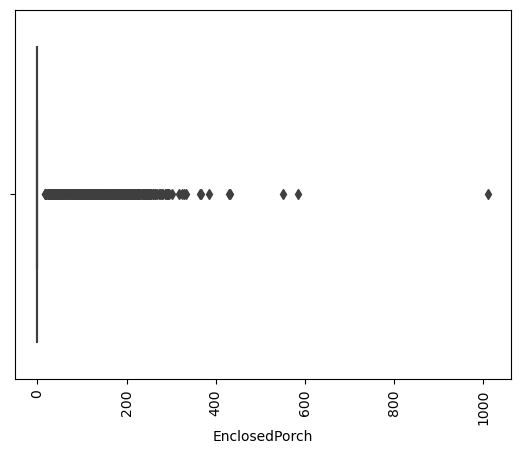

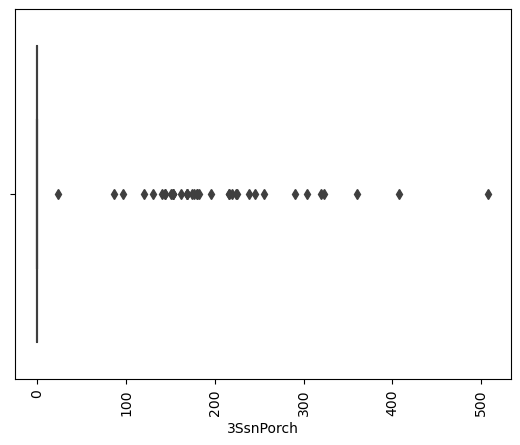

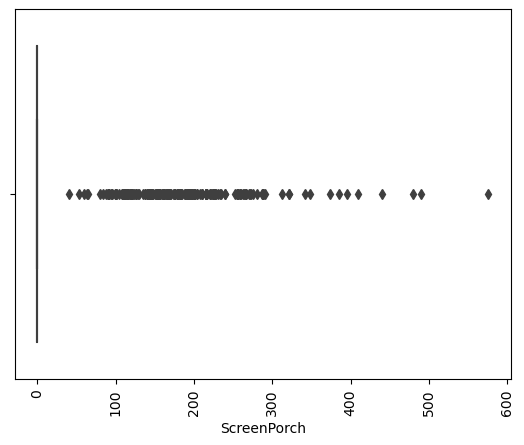

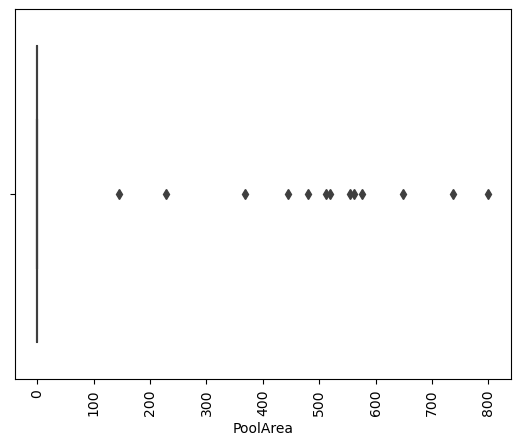

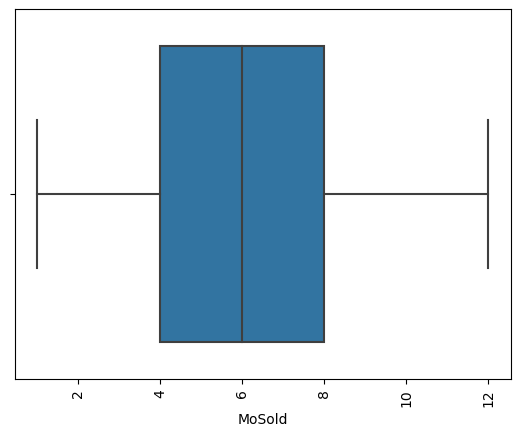

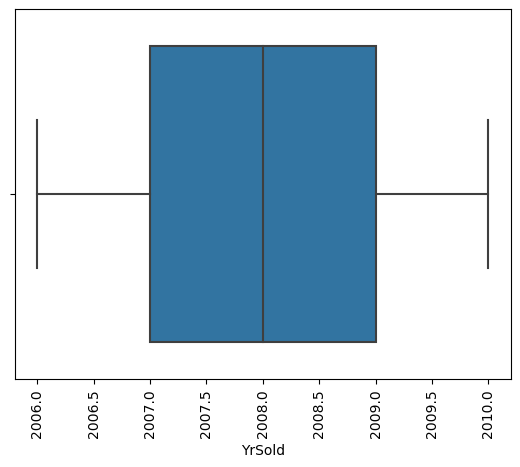

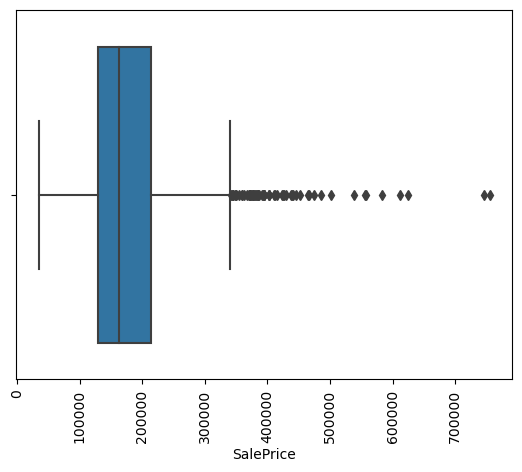

In [20]:
df = pd.concat([train, test], axis =0,ignore_index =True)
df.drop(['Id', 'MiscFeature','MiscVal'],axis =1, inplace = True)

cat_cols = df.select_dtypes(include ='object').columns
num_cols = df.select_dtypes(include = np.number).columns

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.xticks(rotation =90)
    plt.show()

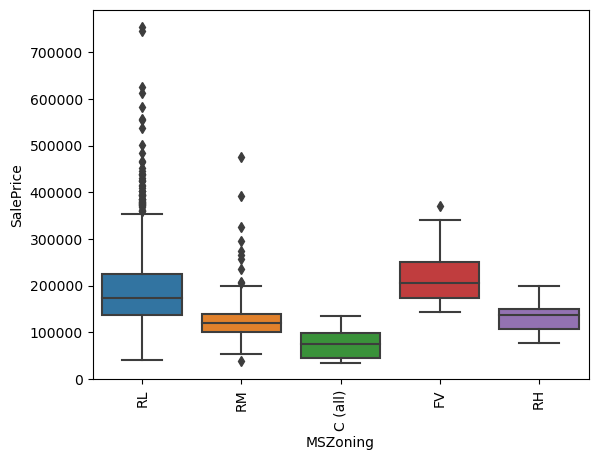

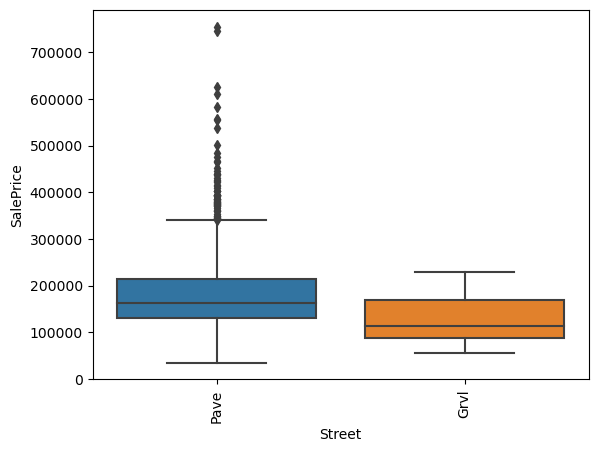

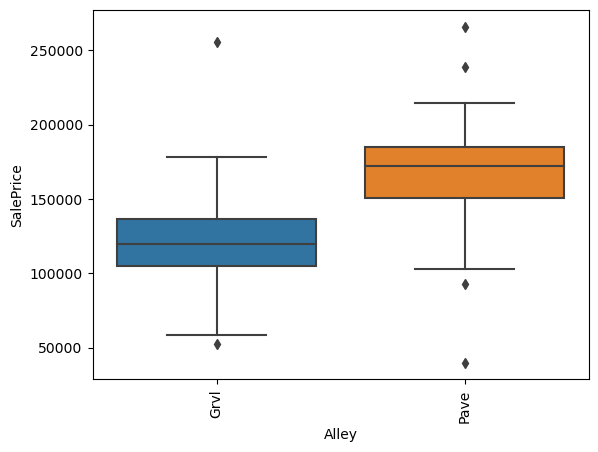

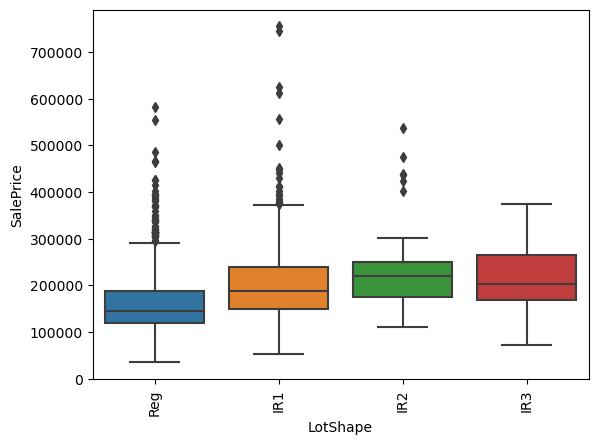

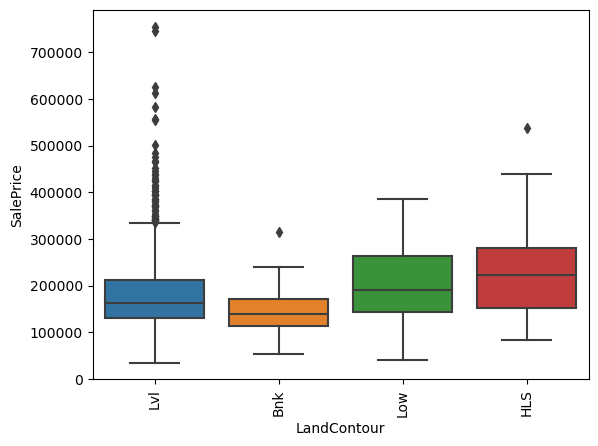

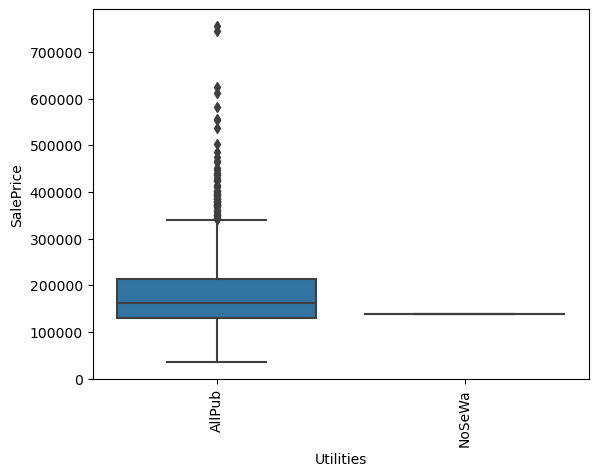

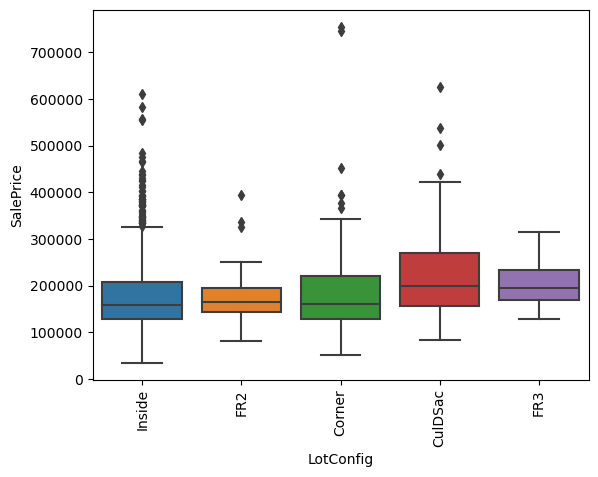

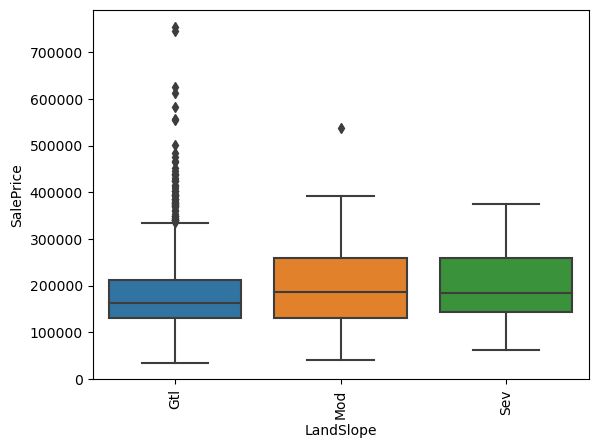

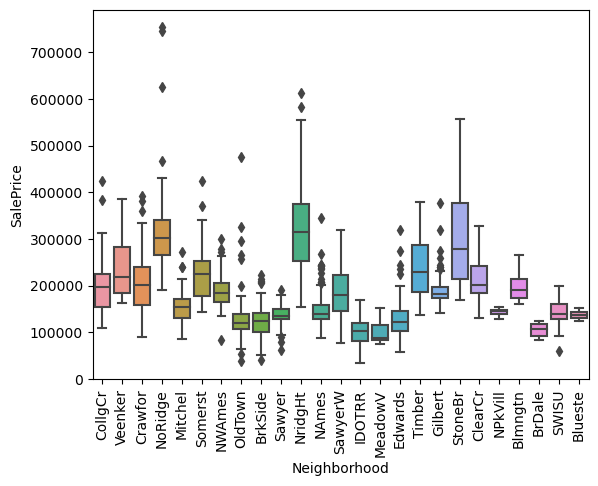

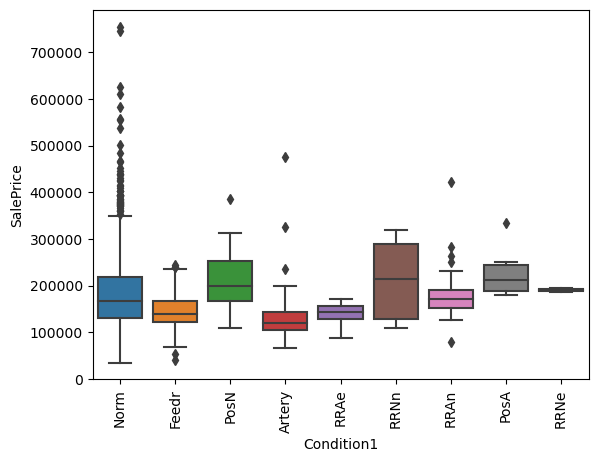

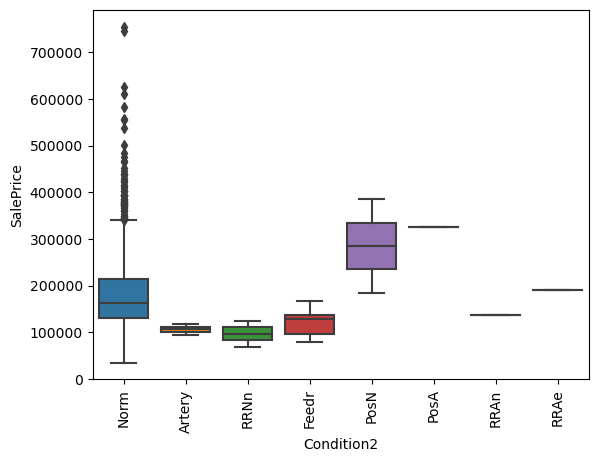

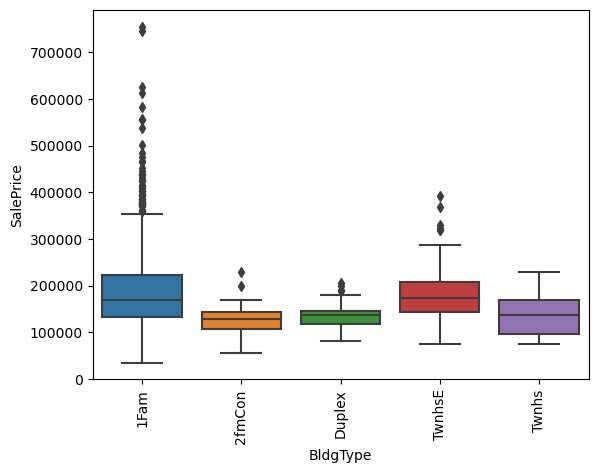

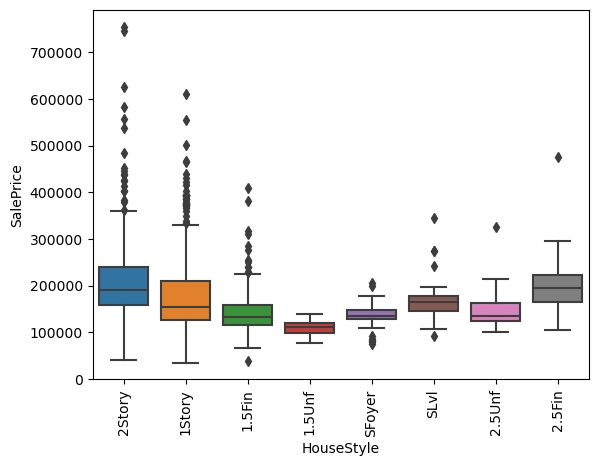

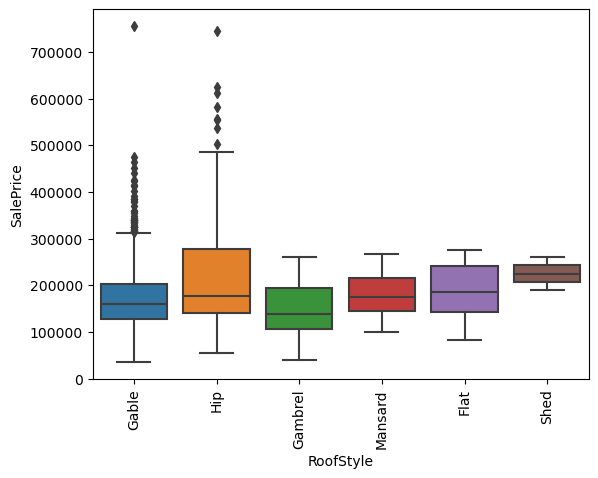

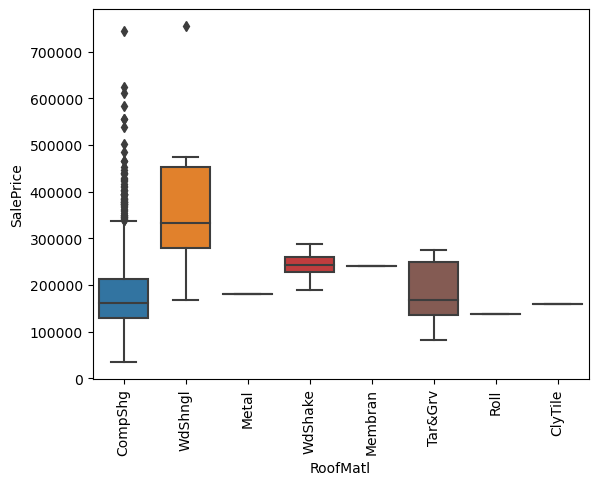

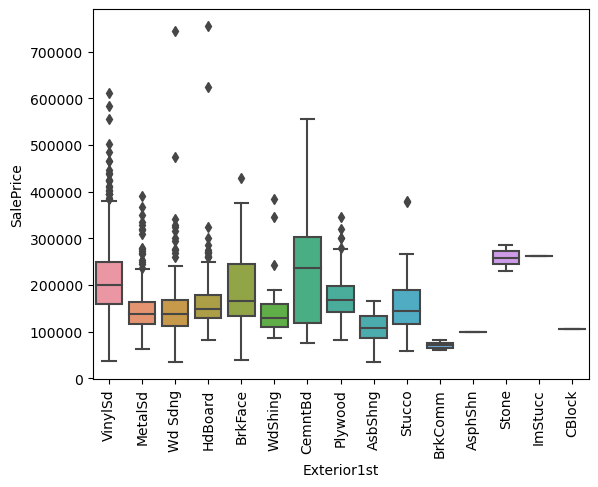

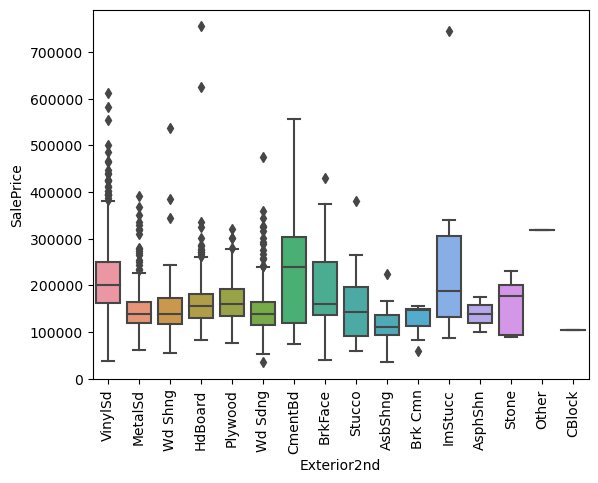

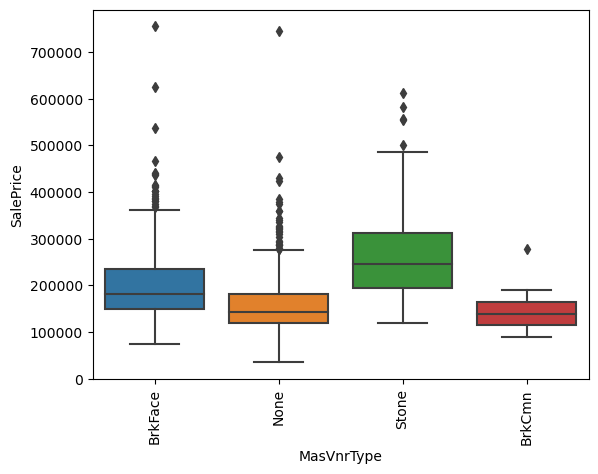

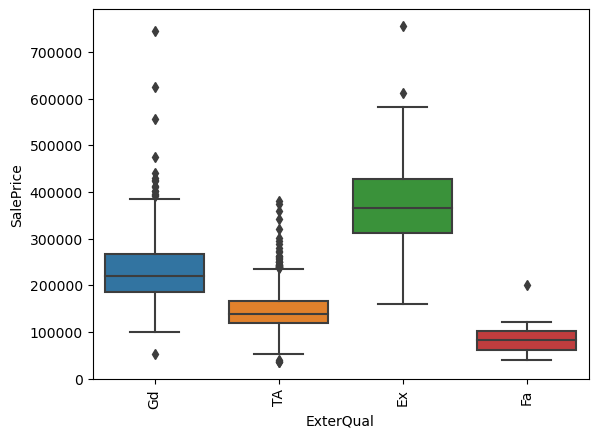

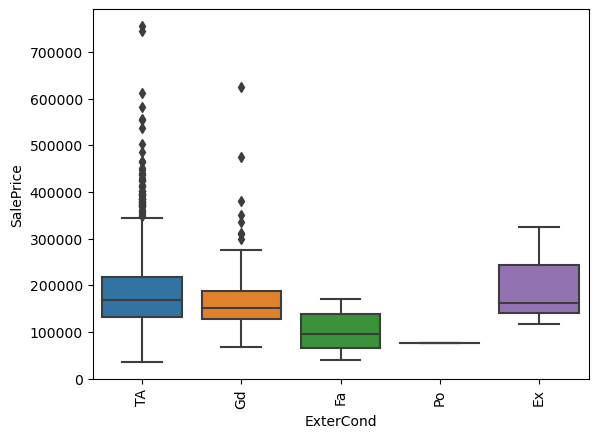

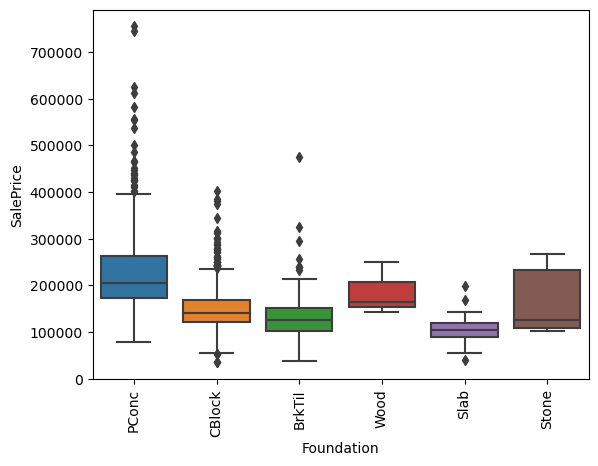

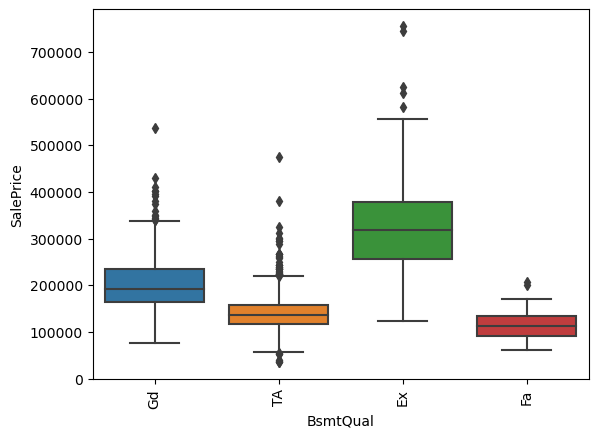

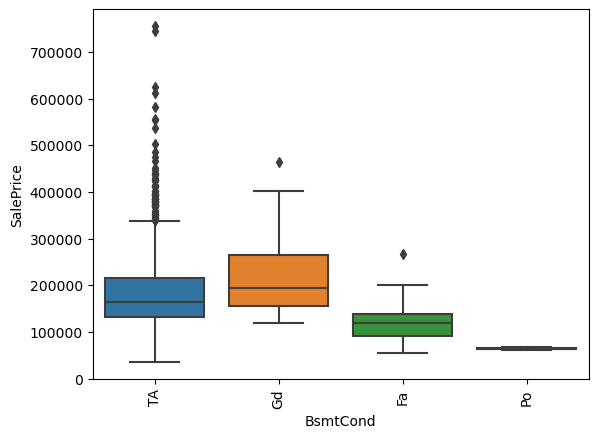

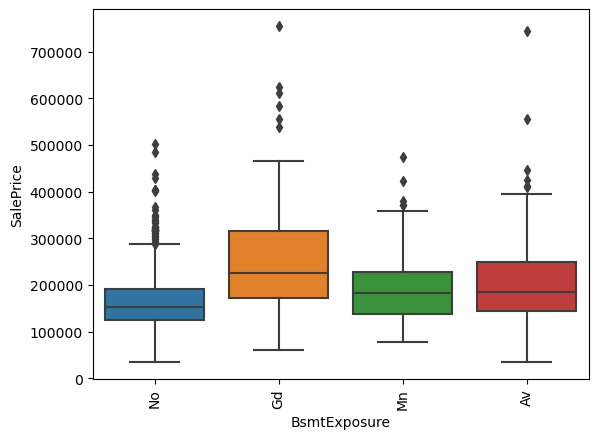

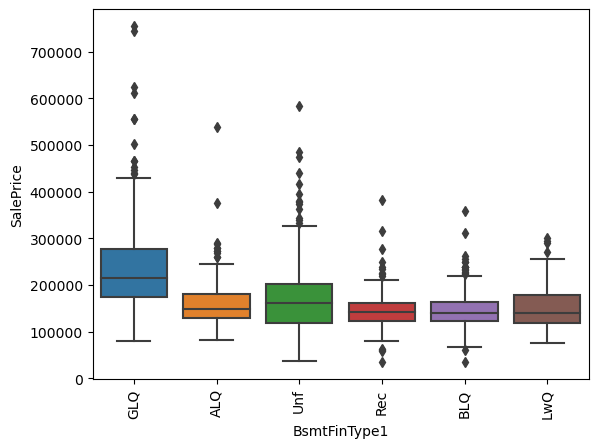

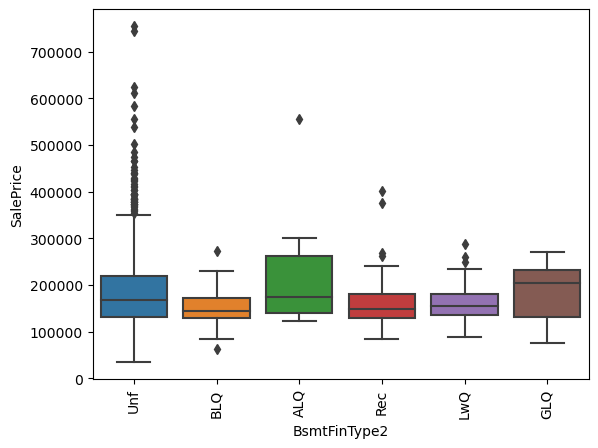

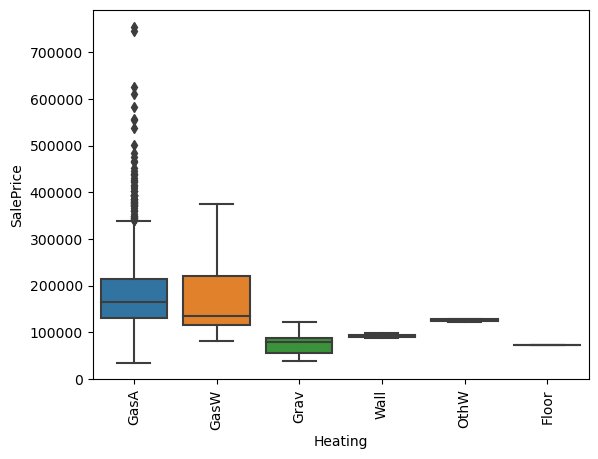

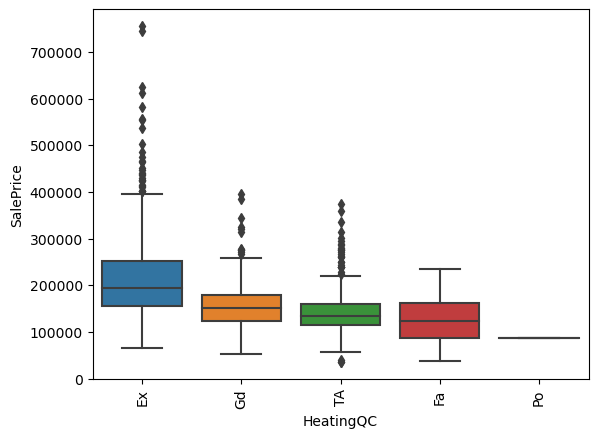

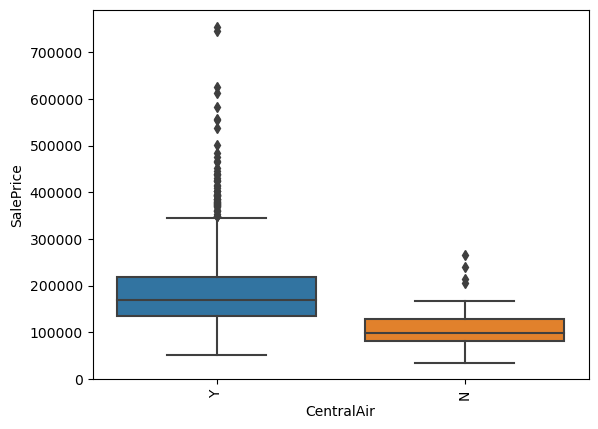

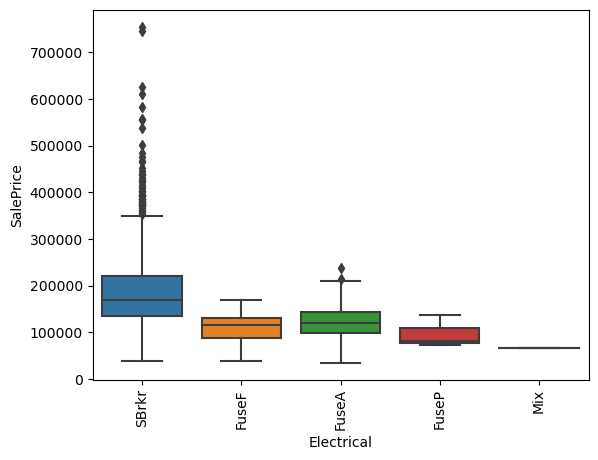

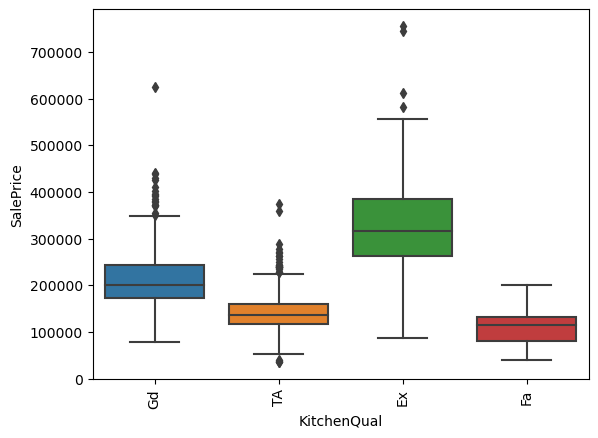

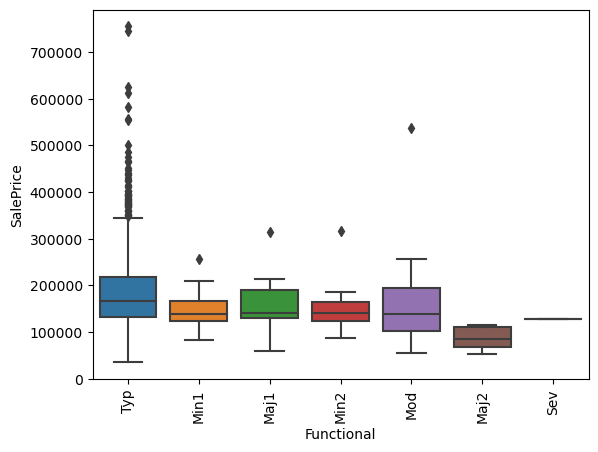

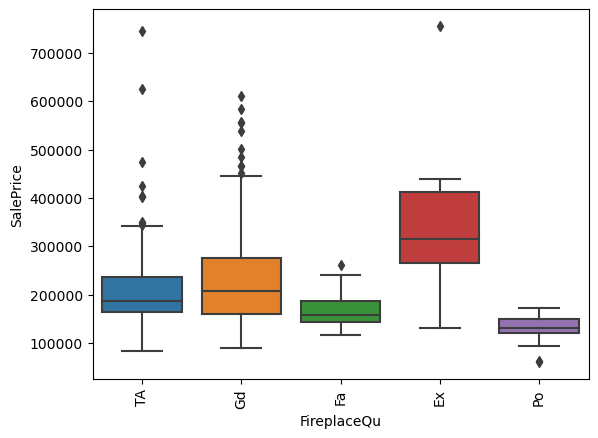

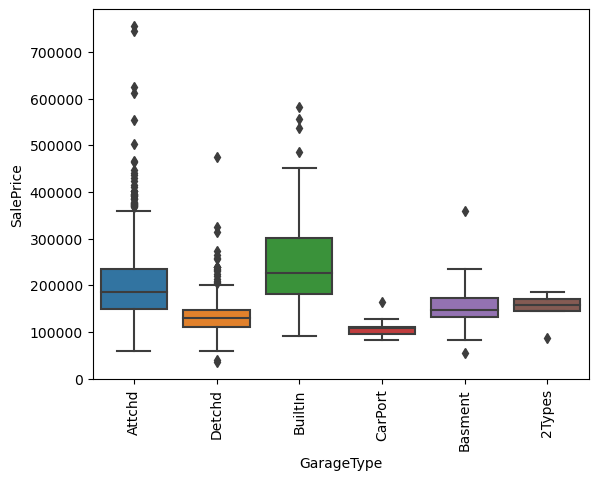

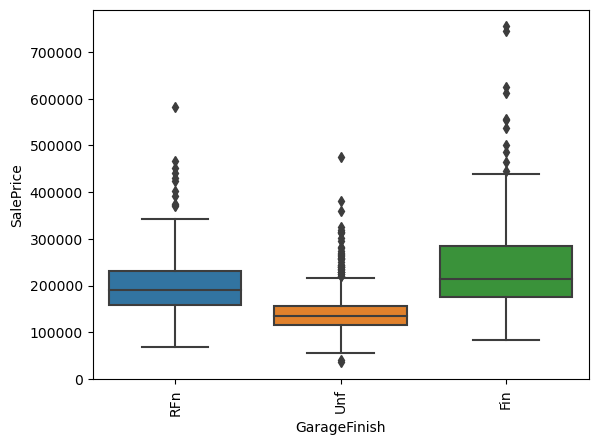

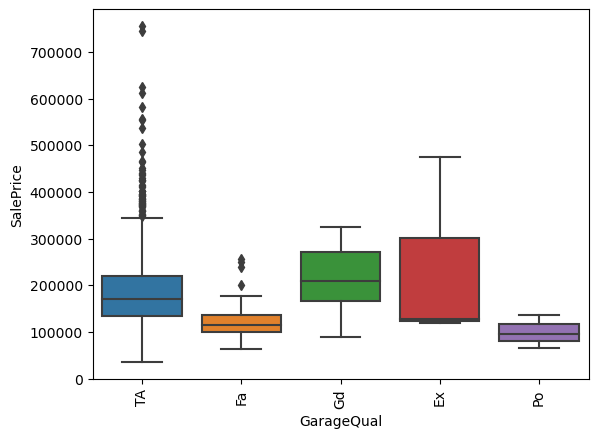

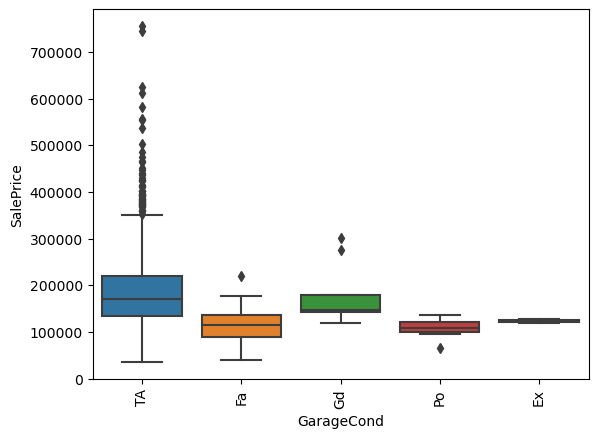

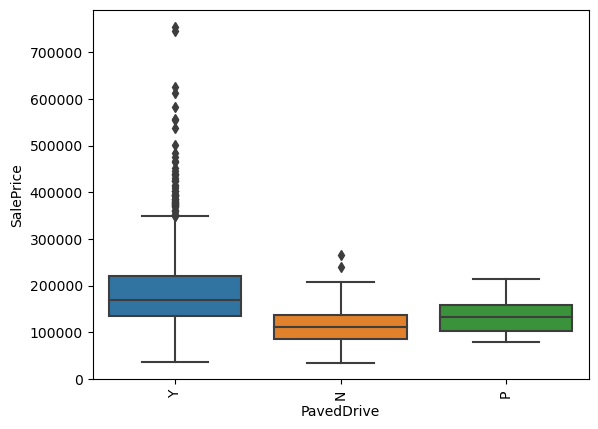

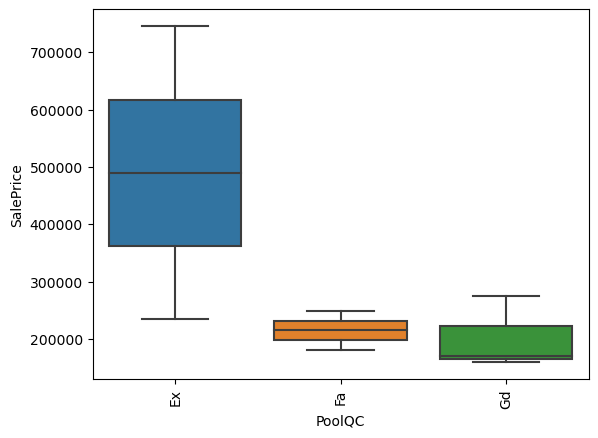

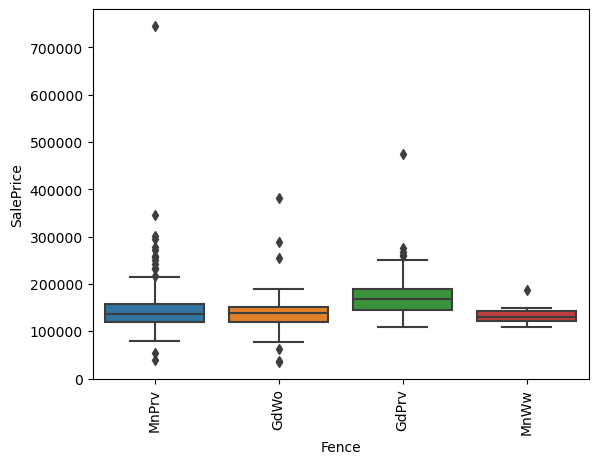

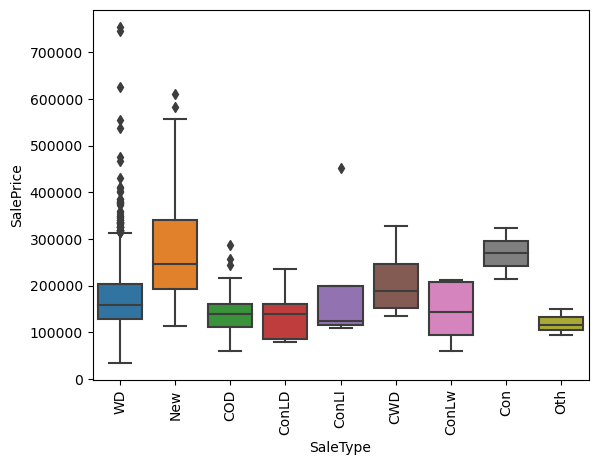

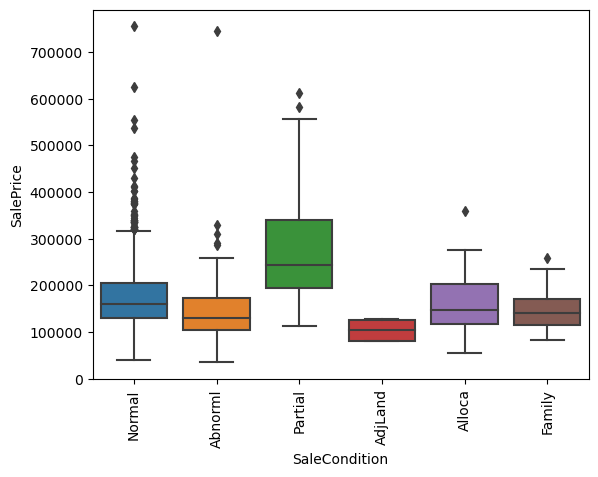

In [21]:
for col in cat_cols:
    sns.boxplot(x=df[col],y= df['SalePrice'])
    plt.xticks(rotation =90)
    plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


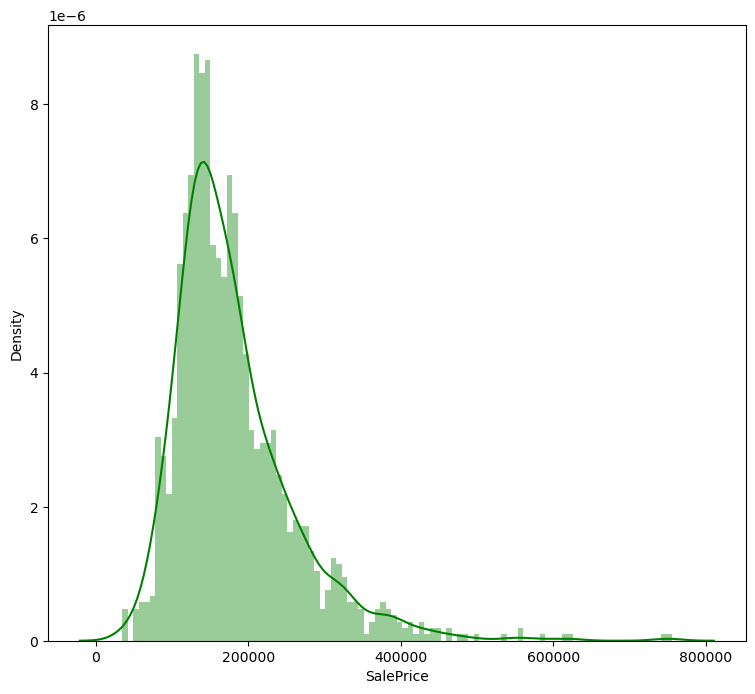

In [22]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train ['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

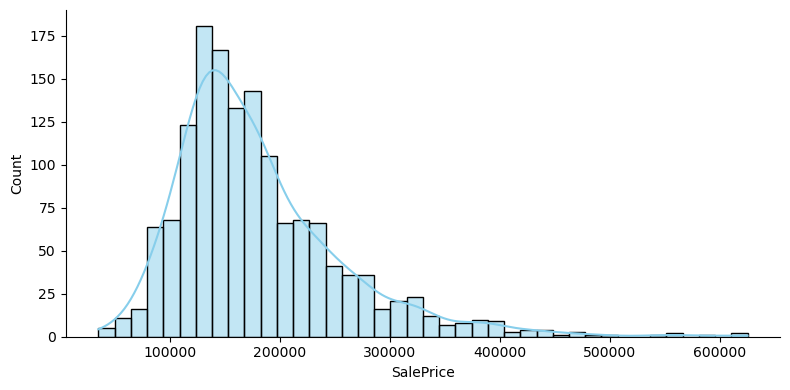

In [23]:
# Define the upper bound value for zooming in
upper_bound = 700000
sns.displot(df.query('SalePrice < @upper_bound')['SalePrice'], kde=True, color='skyblue', height=4, aspect=2)

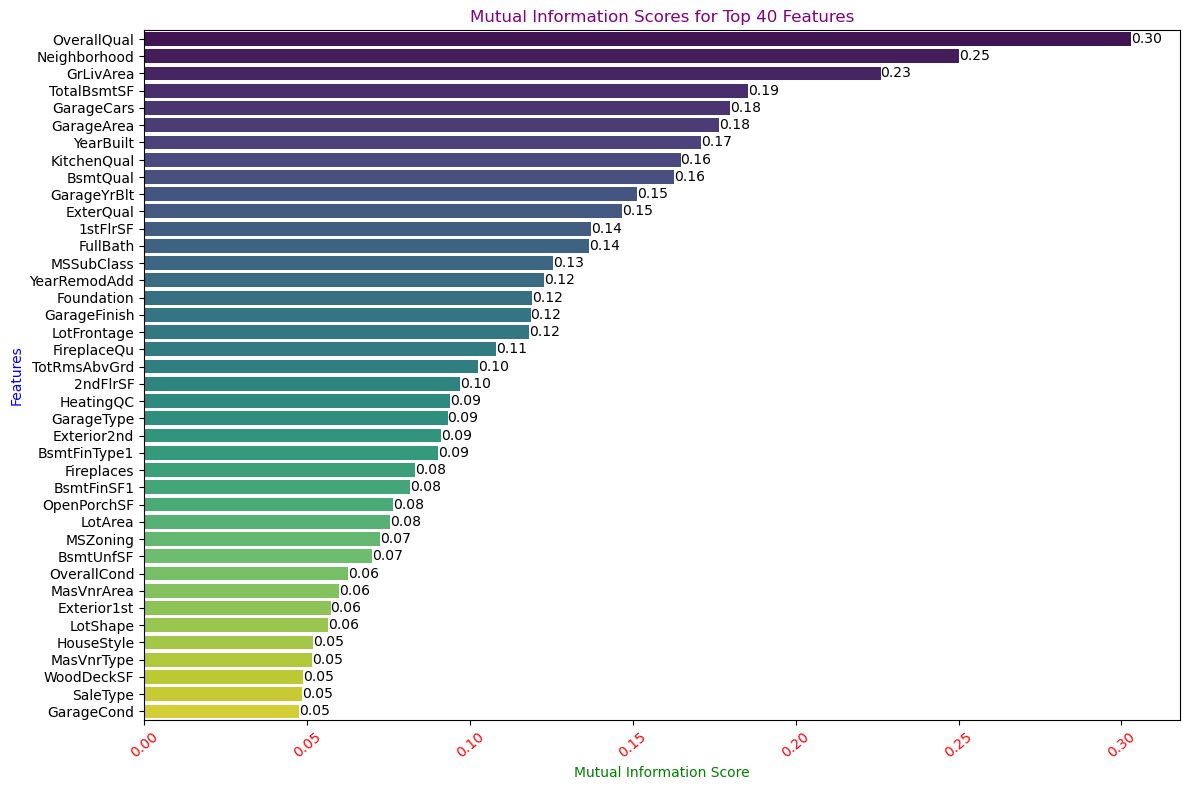

In [24]:
from sklearn.feature_selection import mutual_info_regression

mi_df = df.copy()

# Numerical and categorical encoding
def encoding_numeric_categoric(dataframe):
    numerical_features = dataframe.select_dtypes([np.number])
    categorical_features = dataframe.select_dtypes(["object", "category"])

    # Fill null in numerical features
    for col in numerical_features:
        dataframe[col].fillna(dataframe[col].median(), inplace = True)
    # Label encoding for categorical features
    for col in categorical_features:
        dataframe[col], _ = dataframe[col].factorize()

encoding_numeric_categoric(mi_df)
mi_y = mi_df.pop("SalePrice")

def make_mi_score(X, y):
    mi_score = mutual_info_regression(X, y)
    mi_features = pd.Series(mi_score, name = "MI Score", index = X.columns).sort_values(ascending = False)
    return mi_features

mi_score = make_mi_score(mi_df, mi_y)

def plot_mi_score(score):
    # Number of features
    top_n = 40

    # Top features
    top_features = score[:top_n]

    # Define a colorful color palette for the bars
    colors = sns.color_palette('viridis', n_colors=len(top_features))

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_features.values, y=top_features.index, orient='h', palette=colors)
    plt.title('Mutual Information Scores for Top {} Features'.format(top_n), color='purple')
    plt.xlabel('Mutual Information Score', color='green')
    plt.ylabel('Features', color='blue')
    plt.xticks(rotation=40, color='red')

    # Add the value labels to the bars
    for index, value in enumerate(top_features.values):
        plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

    plt.tight_layout()  
    return plt.show()

plot_mi_score(mi_score)

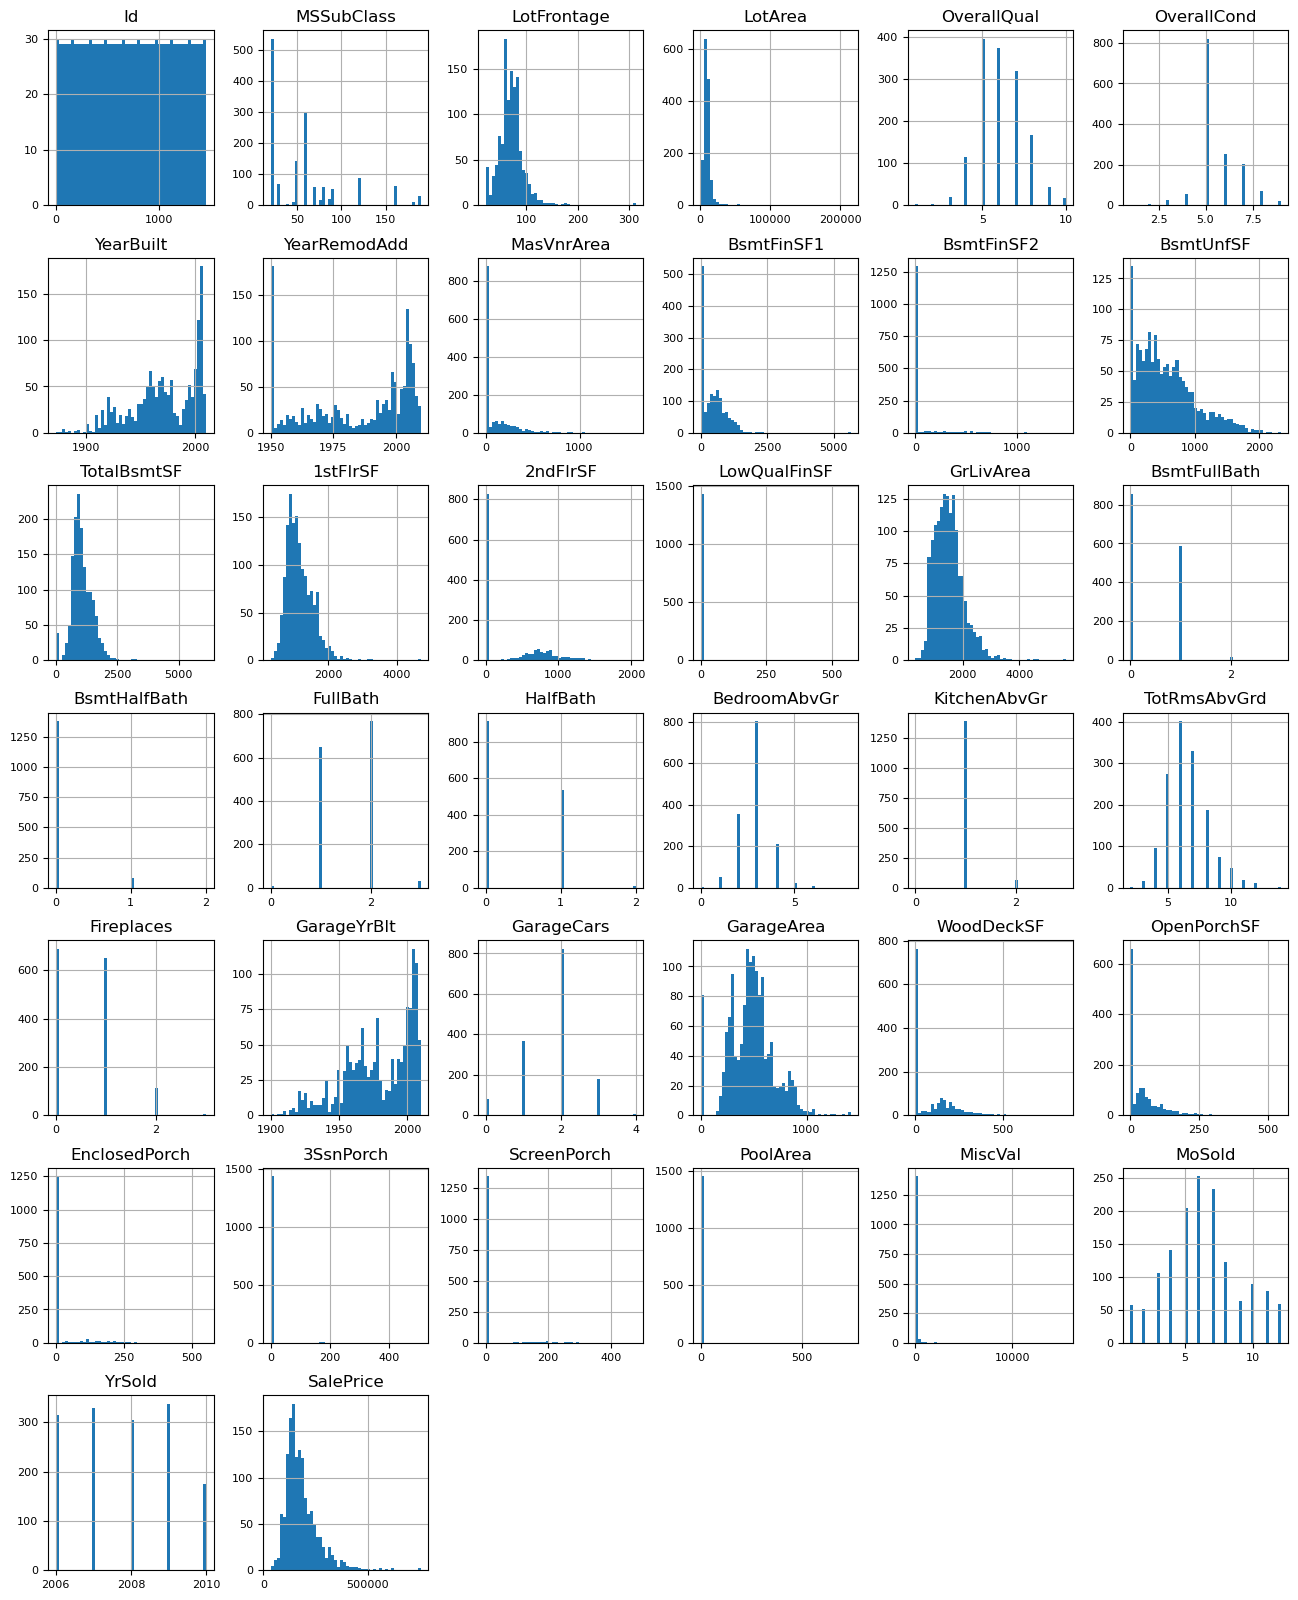

In [25]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [26]:
df_train_num = train.select_dtypes(include=[np.number])
df_train_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

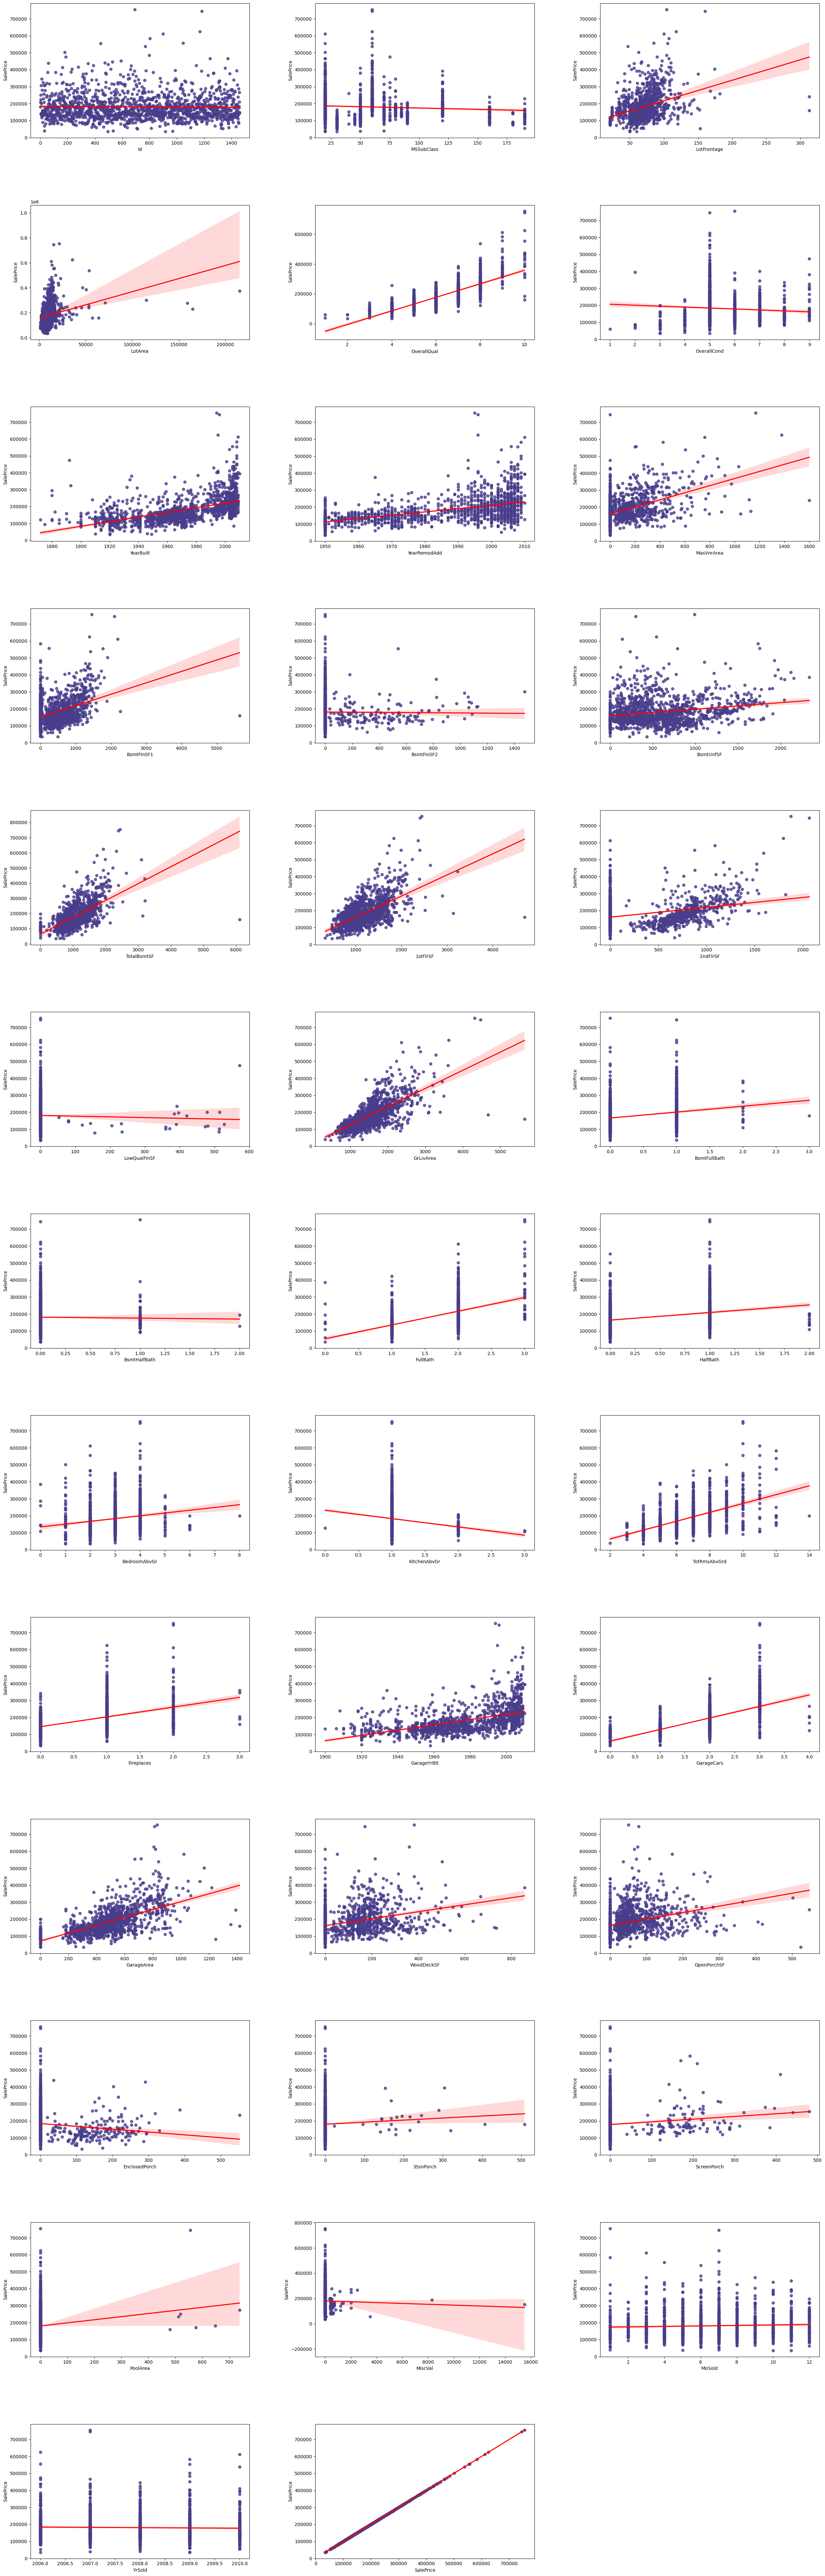

In [27]:
fig= plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

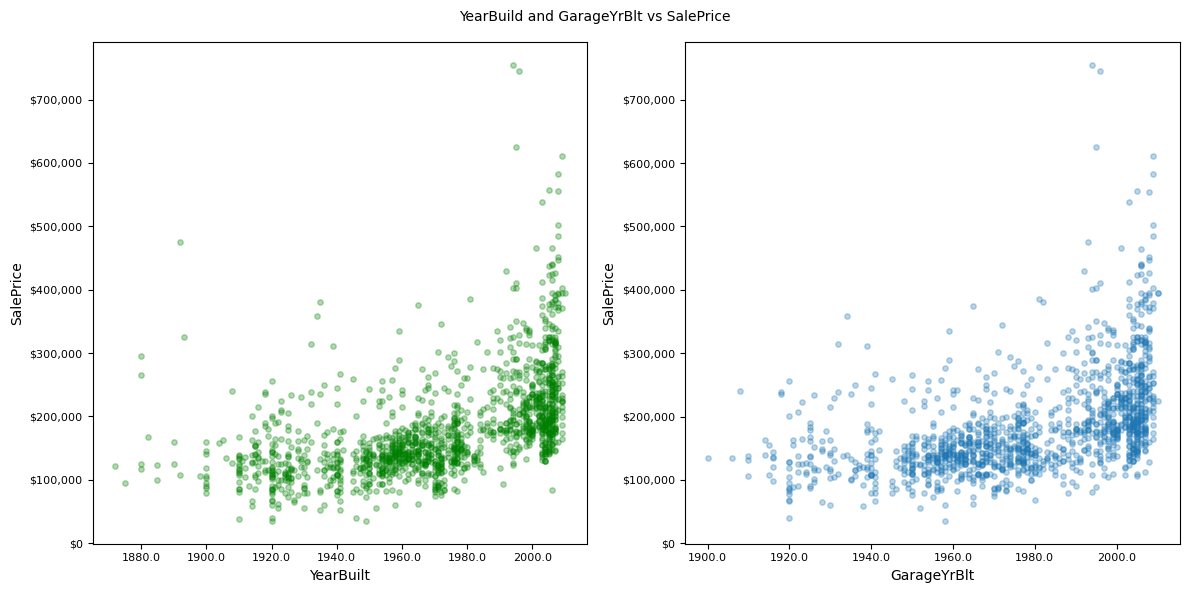

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
sns.regplot(data=df, x='YearBuilt', y='SalePrice', color='green', fit_reg=False, scatter_kws={'s': 60, 'alpha': 0.3}, ax=axes[0], marker='.')
sns.regplot(data=df, x='GarageYrBlt', y='SalePrice', scatter_kws={'s': 60, 'alpha': 0.3}, fit_reg=False, ax=axes[1], marker='.')

for ax in axes:
    ax.set_xticklabels(ax.get_xticks(), fontsize=8)
    y_ticks = ax.get_yticks()
    ax.set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks], fontsize=8)

fig.suptitle("YearBuild and GarageYrBlt vs SalePrice", fontsize=10)

plt.tight_layout()
plt.show()

Top numeric features: Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea',
       'YearBuilt', 'GarageYrBlt', '1stFlrSF', 'FullBath', 'MSSubClass',
       'YearRemodAdd', 'LotFrontage', 'TotRmsAbvGrd', '2ndFlrSF', 'Fireplaces',
       'BsmtFinSF1', 'OpenPorchSF', 'LotArea', 'BsmtUnfSF', 'OverallCond',
       'MasVnrArea', 'WoodDeckSF'],
      dtype='object')

Top categoric features Index(['Neighborhood', 'KitchenQual', 'BsmtQual', 'ExterQual', 'Foundation',
       'GarageFinish', 'FireplaceQu', 'HeatingQC', 'GarageType', 'Exterior2nd',
       'BsmtFinType1', 'MSZoning', 'Exterior1st', 'LotShape', 'HouseStyle',
       'MasVnrType', 'SaleType', 'GarageCond'],
      dtype='object')


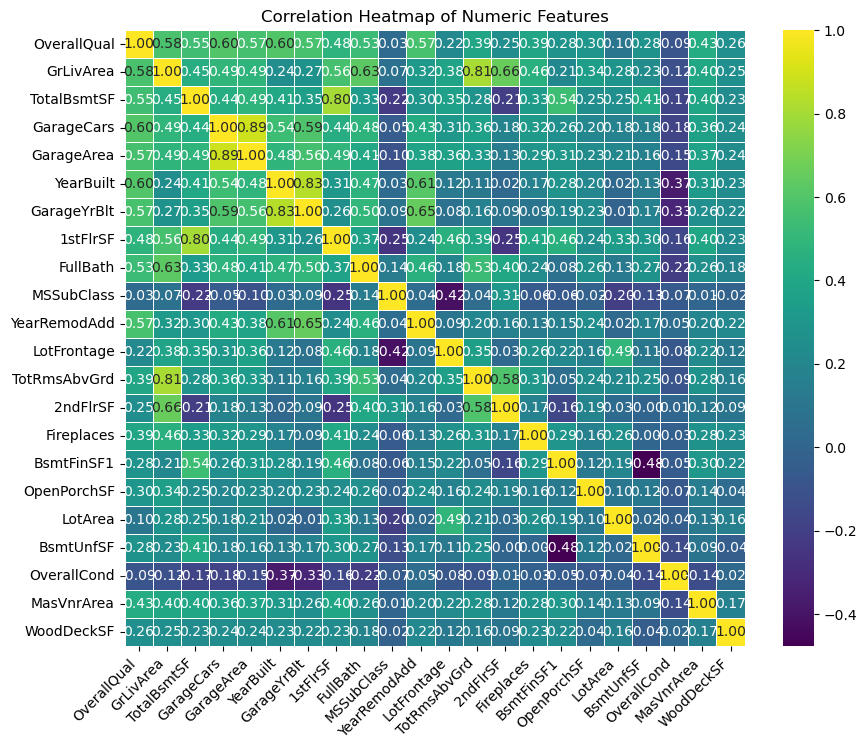

In [29]:
def top_numeric_categoric(features, df):
    top_numerical_features = df[features.index].select_dtypes([np.number])
    top_categorical_features = df[features.index].select_dtypes(["object", "category"])

    top_numerical_columns = top_numerical_features.columns
    top_categorical_columns = top_categorical_features.columns

    return top_numerical_columns, top_categorical_columns

Top_features = mi_score[:40]
top_numeric, top_categoric = top_numeric_categoric(Top_features, df)

print("Top numeric features:", top_numeric, end="\n\n")
print("Top categoric features", top_categoric)

# convert the pandas Index objects to Python lists
top_numerics = list(top_numeric)
top_categoric = list(top_categoric)

# Compute the correlation matrix for the numeric features
corr_matrix = df[top_numerics].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f")

# Set plot title
plt.title('Correlation Heatmap of Numeric Features', fontsize=12)
plt.xticks(rotation=45 ,ha='right')
# Show the plot
plt.show()

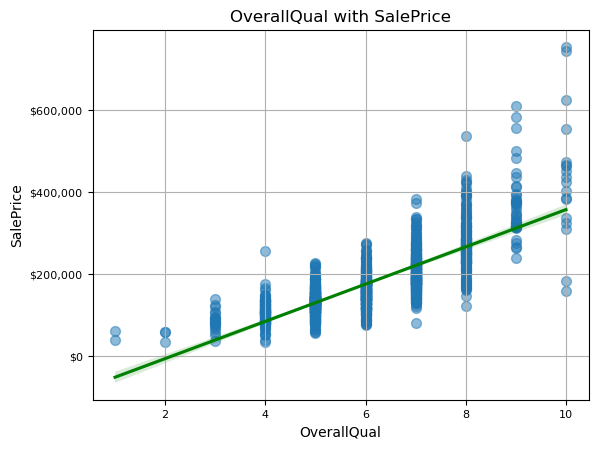

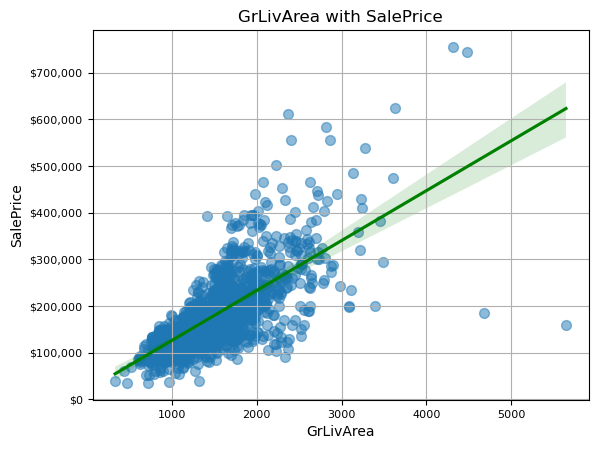

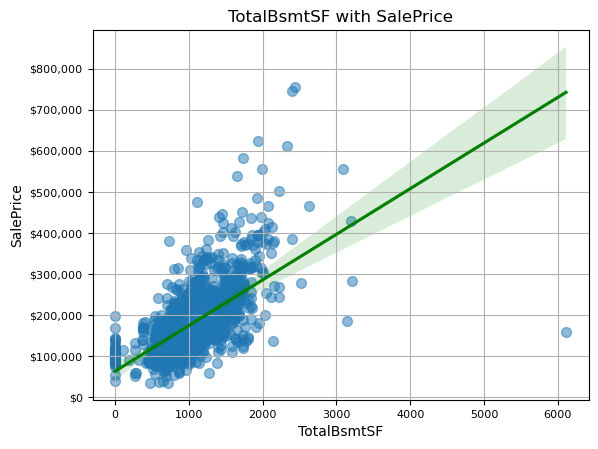

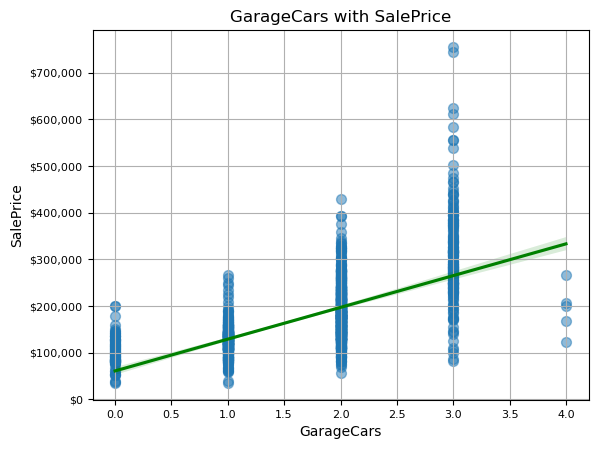

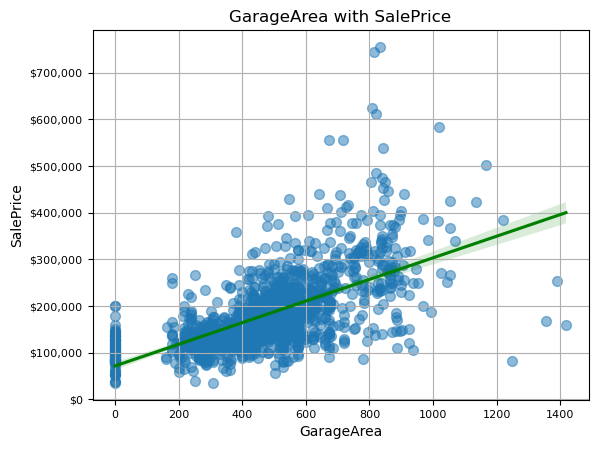

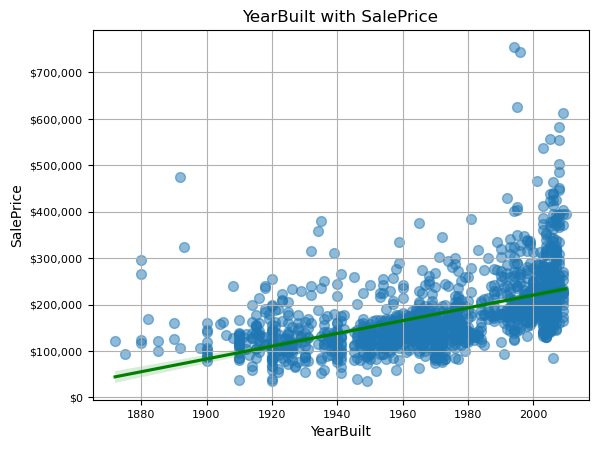

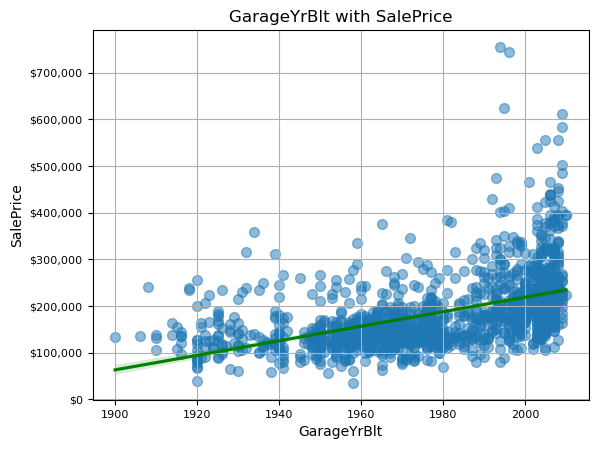

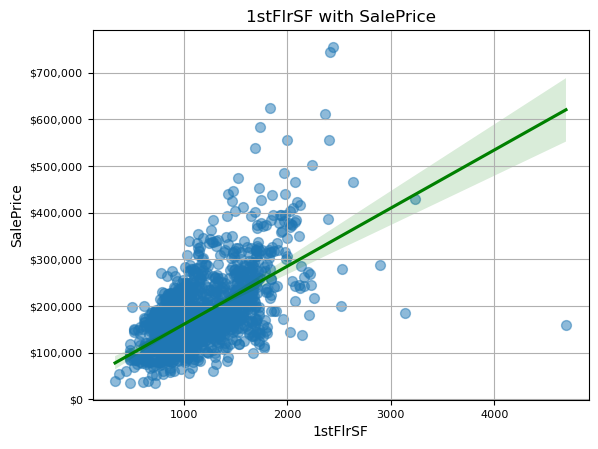

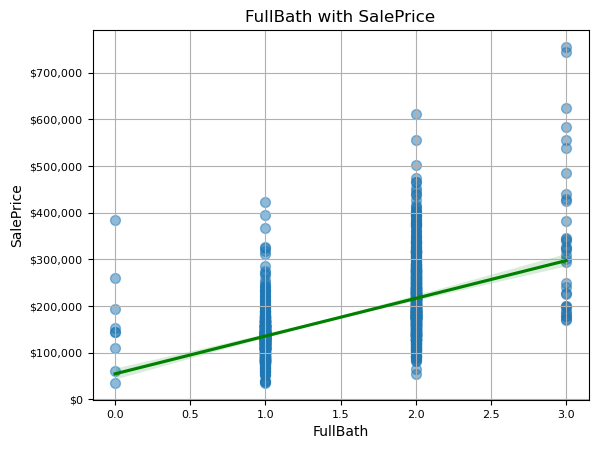

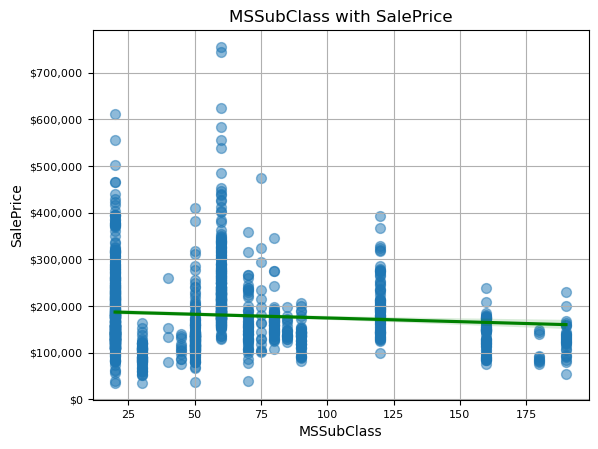

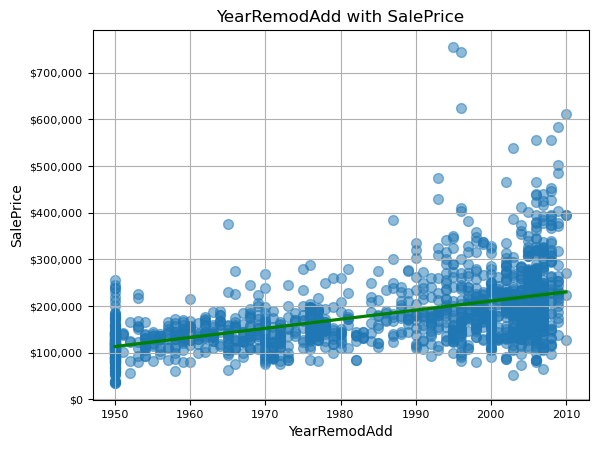

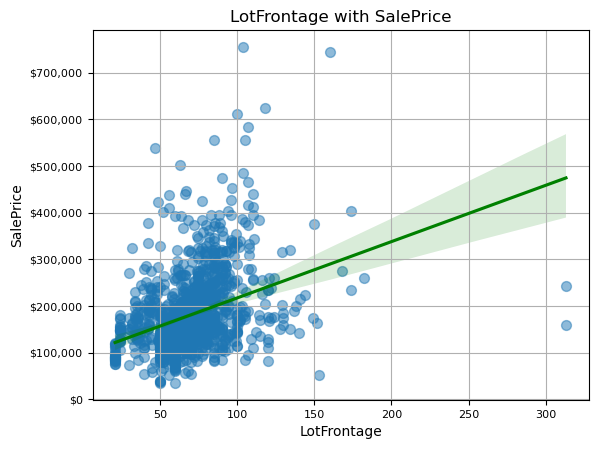

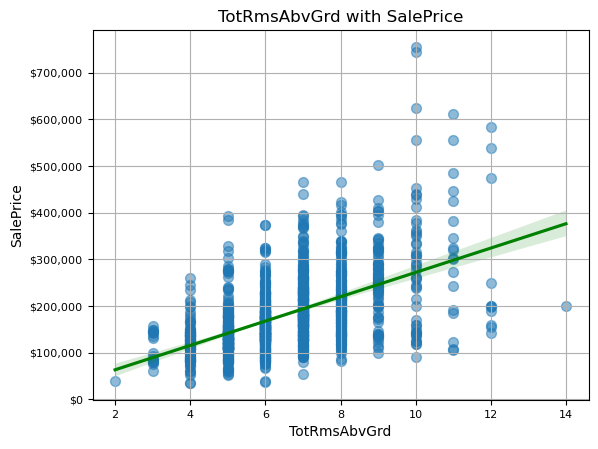

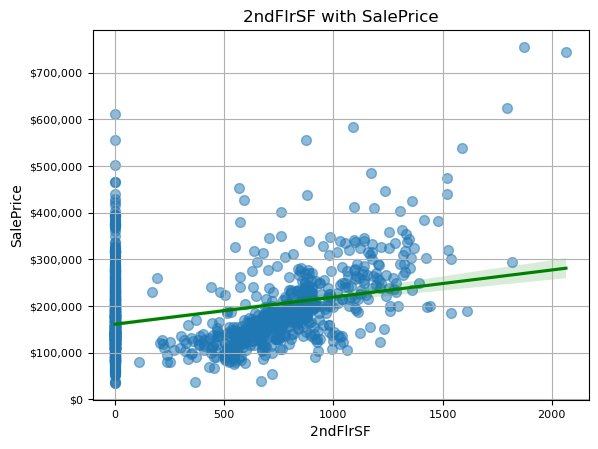

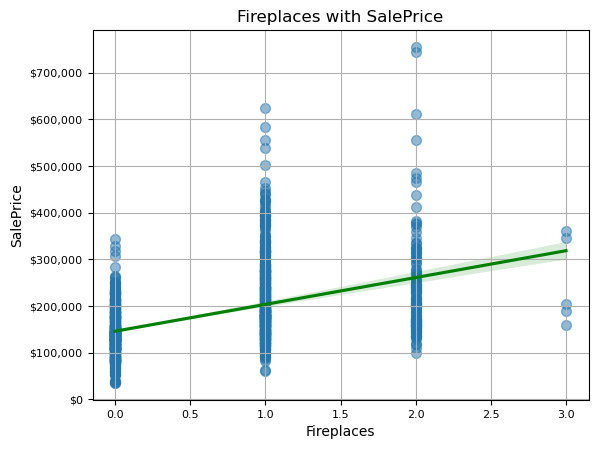

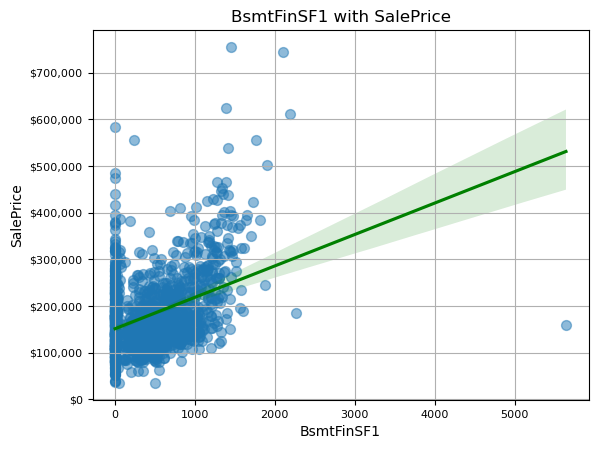

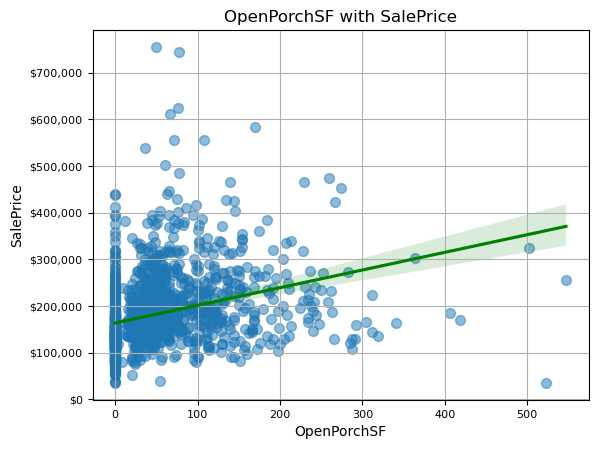

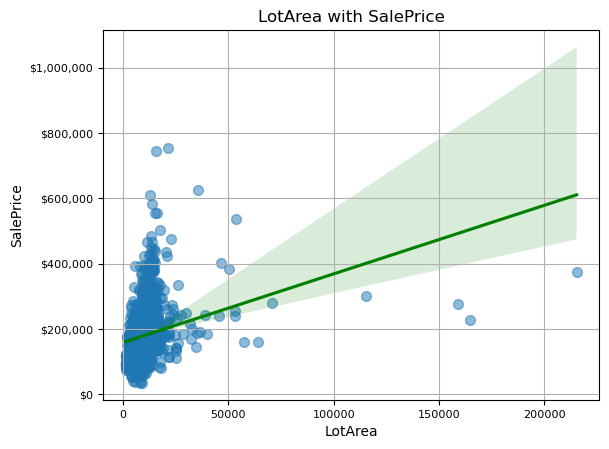

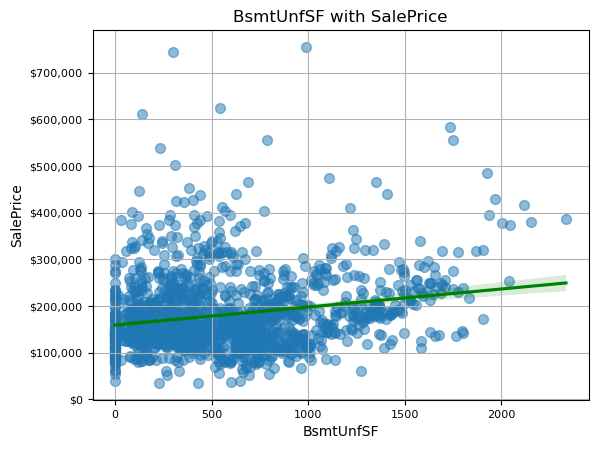

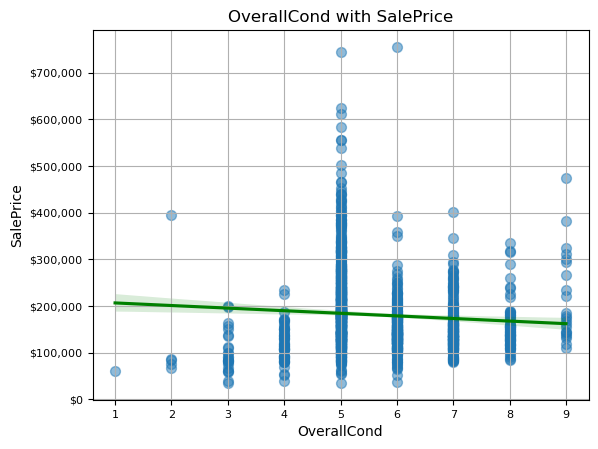

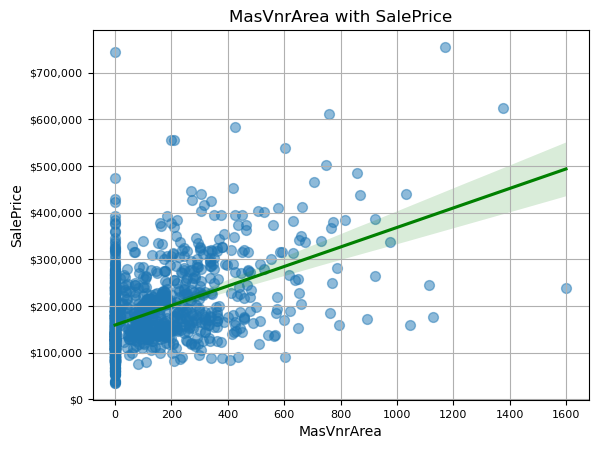

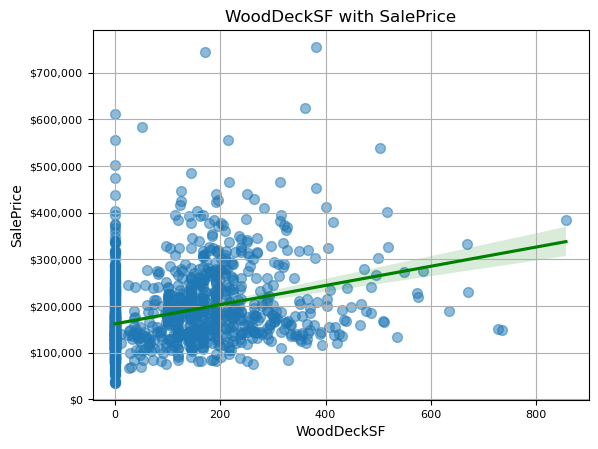

In [30]:
# Scatter plot with regression line for 'Top numeric features' and 'SalePrice'
for features in top_numerics:
    sns.regplot(x=features, y='SalePrice', data=df, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'green'})

    # Set plot title and labels
    plt.title(f'{features} with SalePrice', fontsize=12)
    plt.xlabel(features, fontsize=10)
    plt.ylabel('SalePrice', fontsize=10)

    # Customize the grid and ticks
    plt.grid(True)

    y_ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show the plot
    plt.show()

<Axes: >

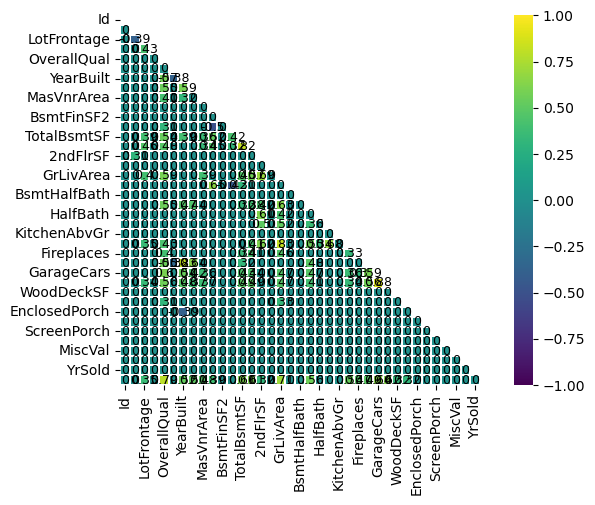

In [31]:
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

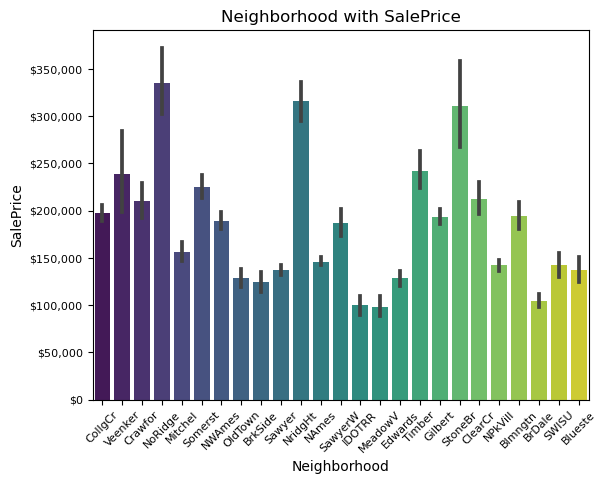

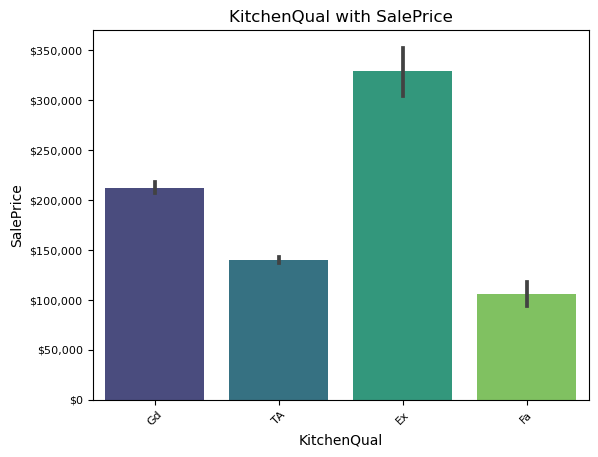

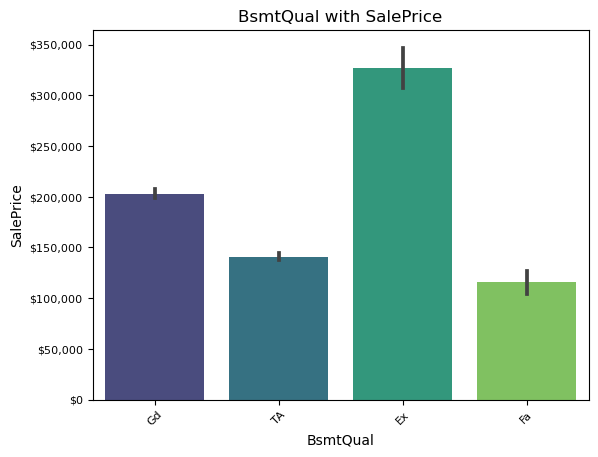

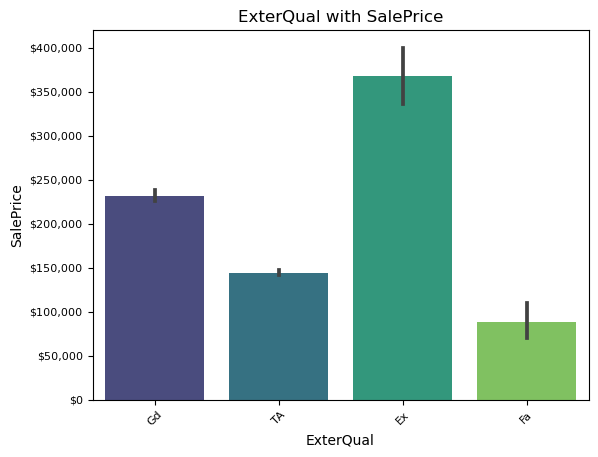

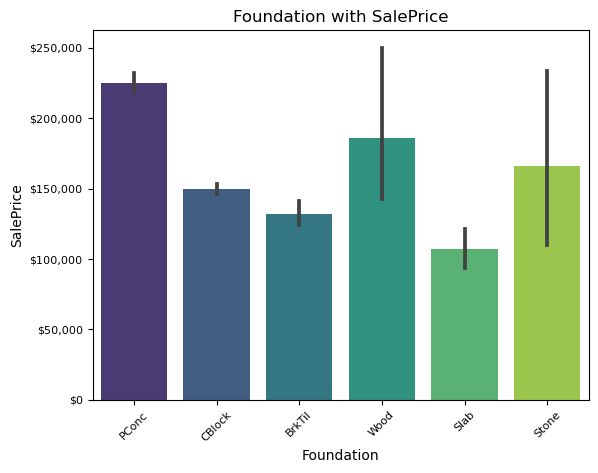

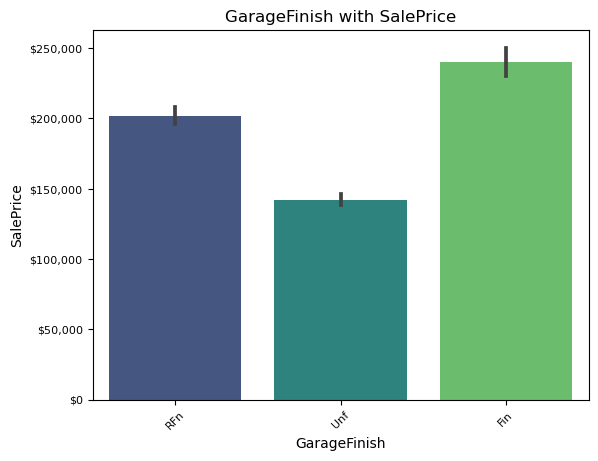

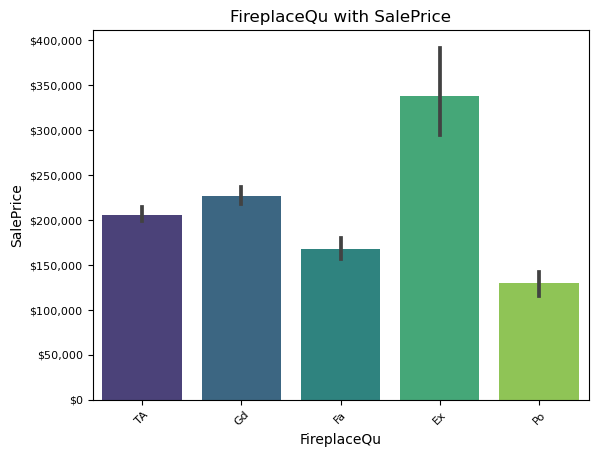

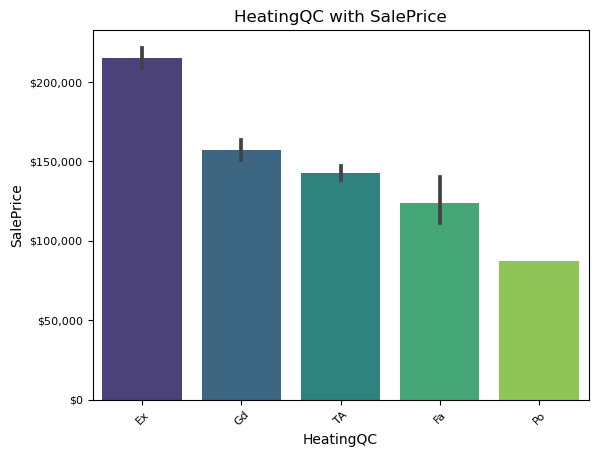

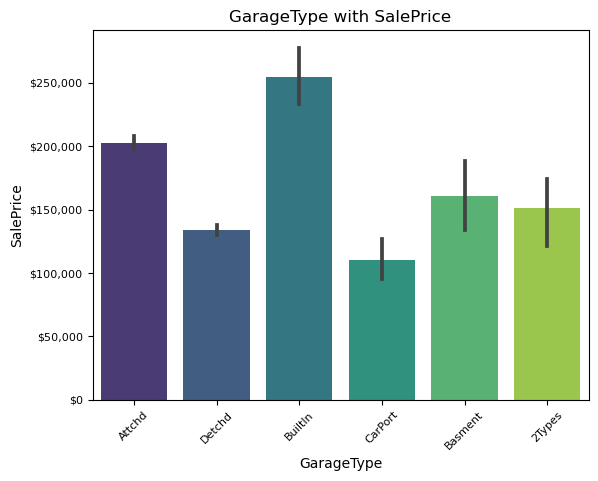

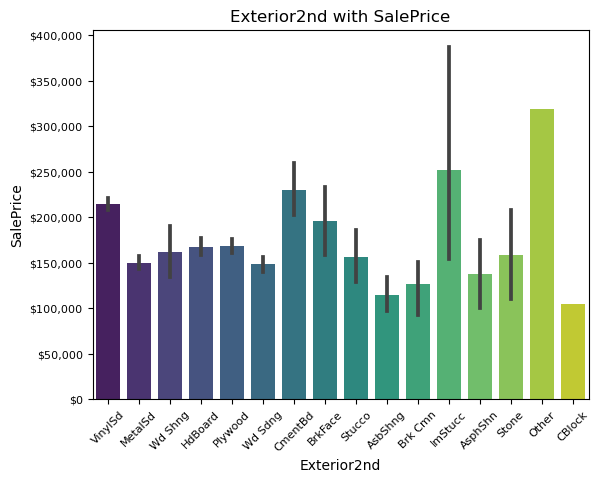

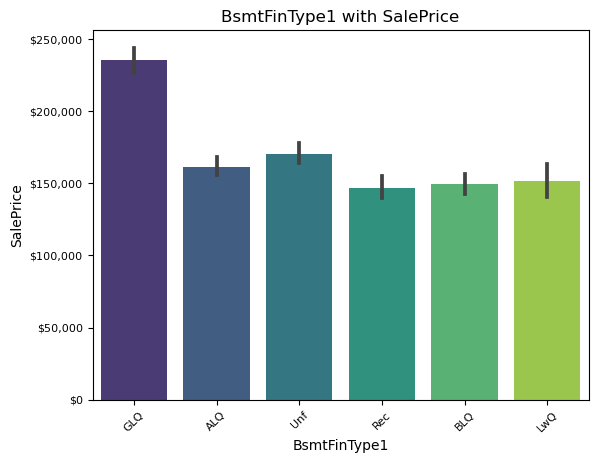

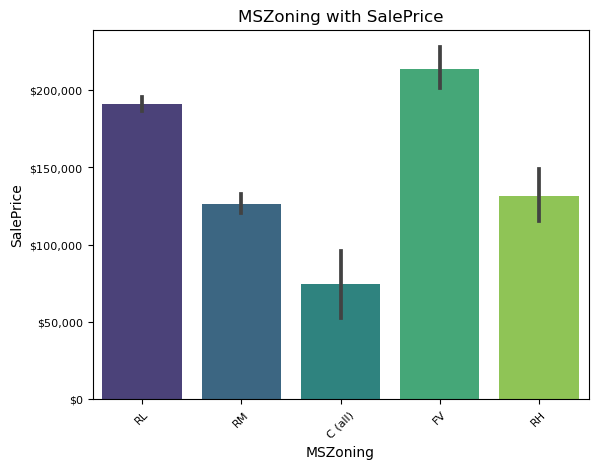

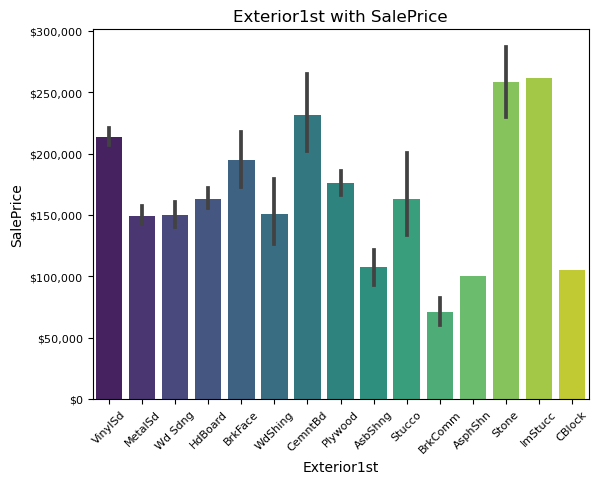

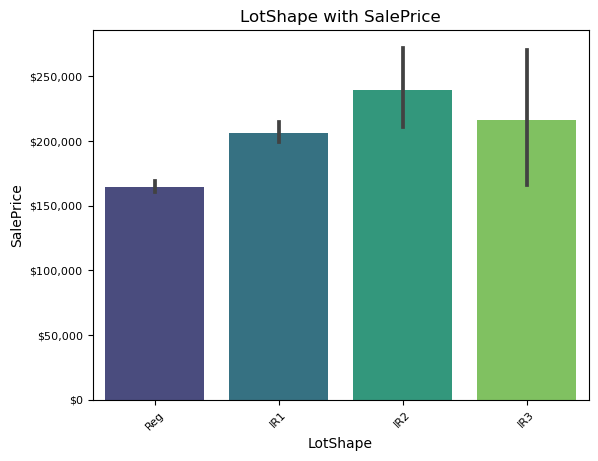

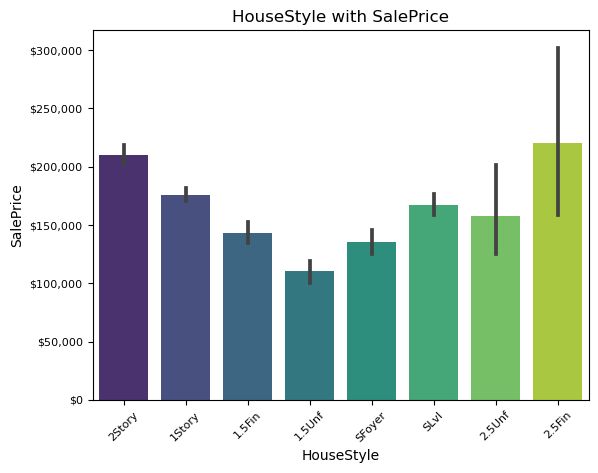

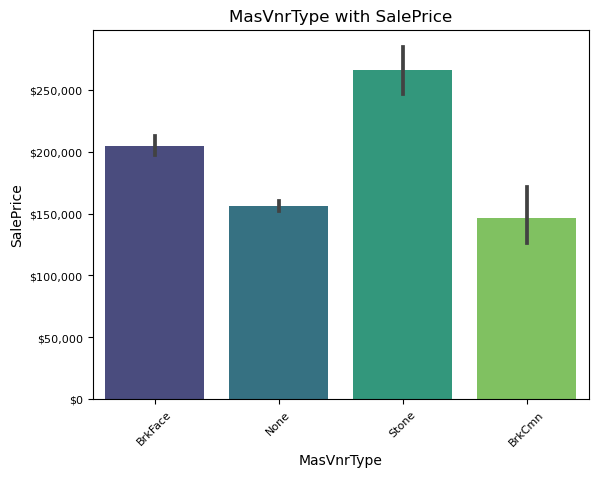

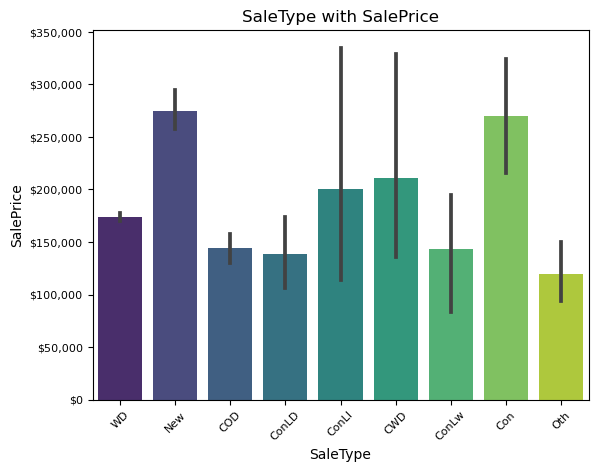

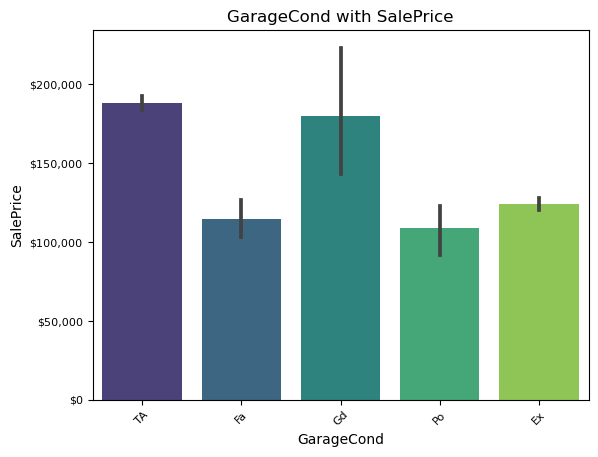

In [32]:
#Bar plot with regression line for 'Top categorical features' and 'SalePrice'
for features in top_categoric:
    sns.barplot(x=features, y='SalePrice', data=df, palette='viridis')

    # Set plot title and labels
    plt.title(f'{features} with SalePrice', fontsize=12)
    plt.xlabel(features, fontsize=10)
    plt.ylabel('SalePrice', fontsize=10)

    plt.xticks(rotation=45)

    y_ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['${:,.0f}'.format(values) for values in y_ticks])
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Show the plot
    plt.show()

In [33]:
#Feature Engineering
df['TotalFlrSF'] = df['2ndFlrSF']+df['1stFlrSF']

df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

df.drop(['Condition2','BsmtFinSF2','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
             'GarageArea','Street','Utilities','LandSlope','KitchenAbvGr','MoSold','YrSold','EnclosedPorch',
        'MSSubClass','LowQualFinSF','3SsnPorch','PoolArea'],axis =1, inplace = True)

df[df.select_dtypes(include=np.number).columns].corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.00
OverallQual     0.79
TotalArea       0.78
TotalFlrSF      0.72
GarageCars      0.64
TotalBsmtSF     0.61
TotRmsAbvGrd    0.53
YearBuilt       0.52
YearRemodAdd    0.51
GarageYrBlt     0.49
MasVnrArea      0.48
Fireplaces      0.47
BsmtFinSF1      0.39
LotFrontage     0.35
WoodDeckSF      0.32
OpenPorchSF     0.32
LotArea         0.26
BsmtUnfSF       0.21
BedroomAbvGr    0.17
ScreenPorch     0.11
OverallCond    -0.08
Name: SalePrice, dtype: float64

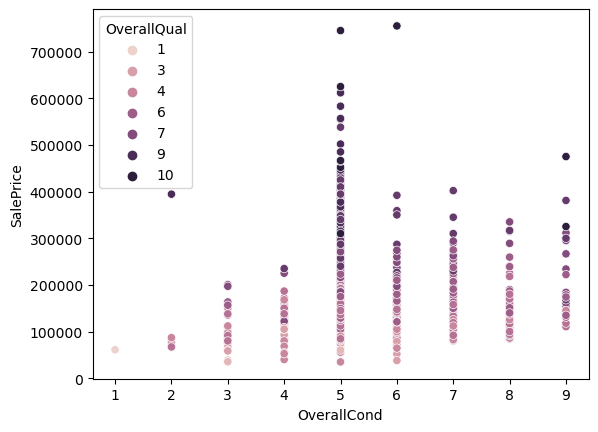

In [34]:
sns.scatterplot(x='OverallCond', y='SalePrice',hue = 'OverallQual',data =df)
plt.show()

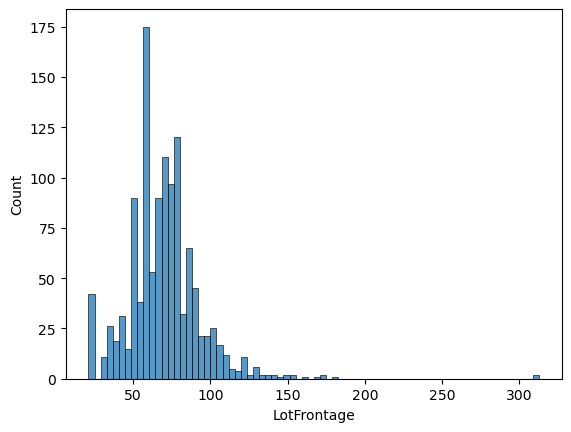

In [35]:
#Removing skewness of dataset
train=df[df['SalePrice'].notnull()]
test=df[df['SalePrice'].isnull()]
test.drop('SalePrice', axis=1, inplace=True)

X=train.drop('SalePrice', axis=1)
Y=train['SalePrice']
sns.histplot(x='LotFrontage', data =X)
plt.show()

Text(0, 0.5, 'Column Name\n')

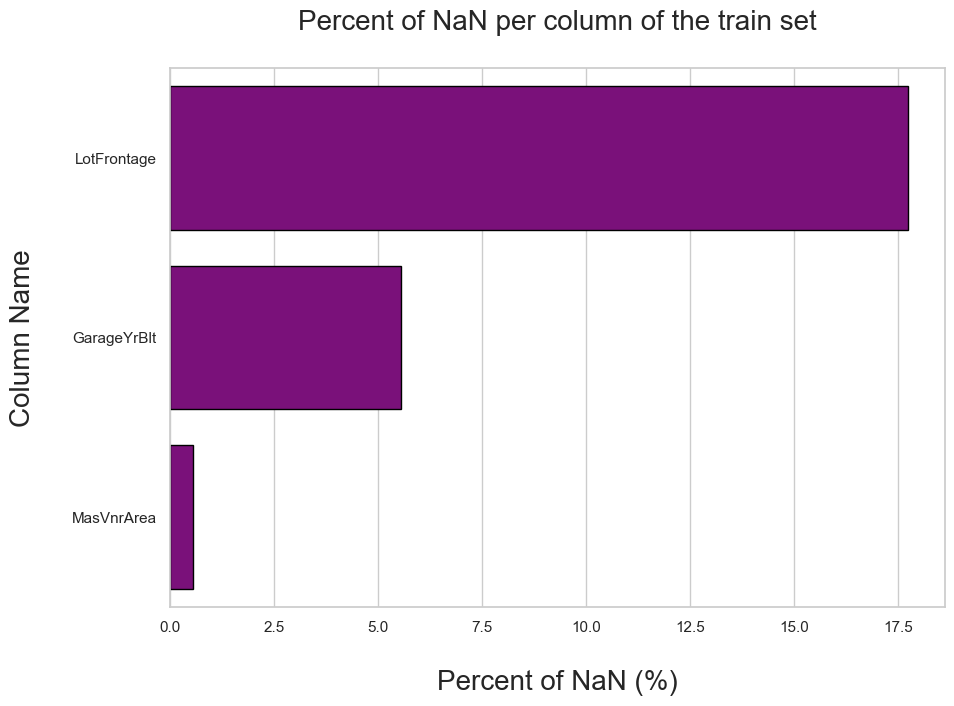

In [36]:
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

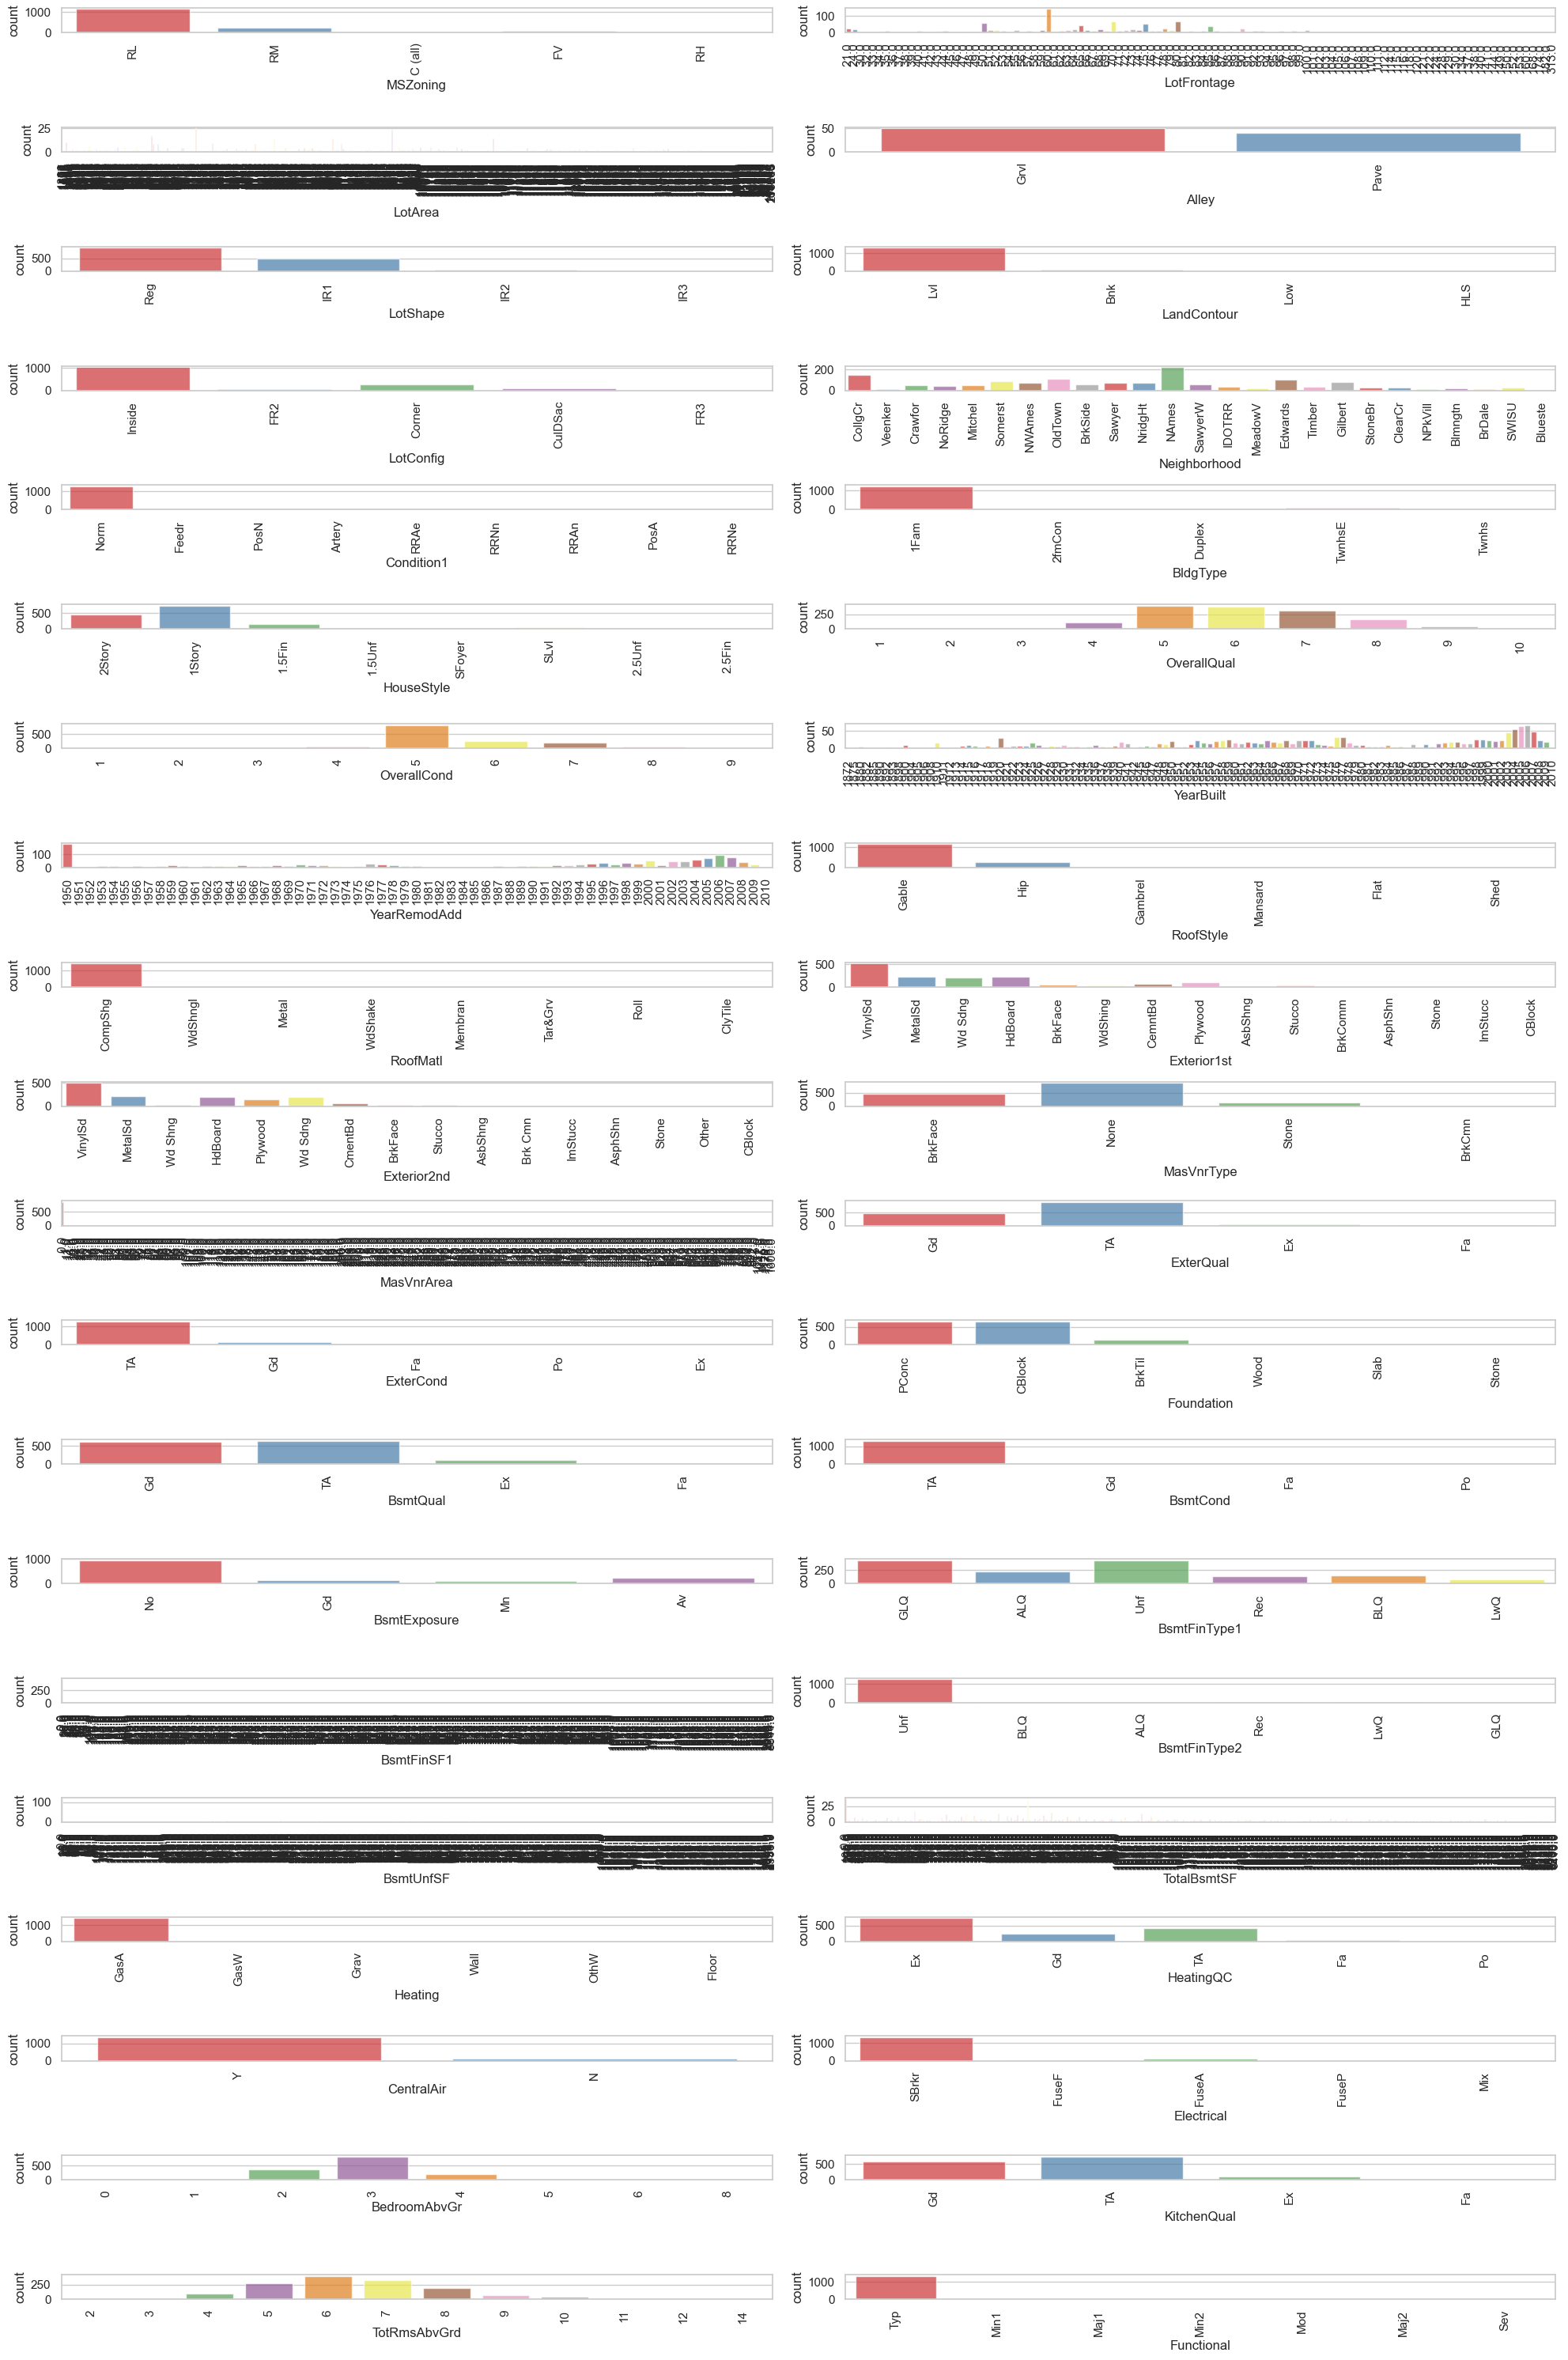

In [37]:
fig, axes = plt.subplots(round(len(train.columns) / 3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(train.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=train.columns[i], alpha=0.7, data=train, ax=ax, palette = "Set1")

fig.tight_layout()

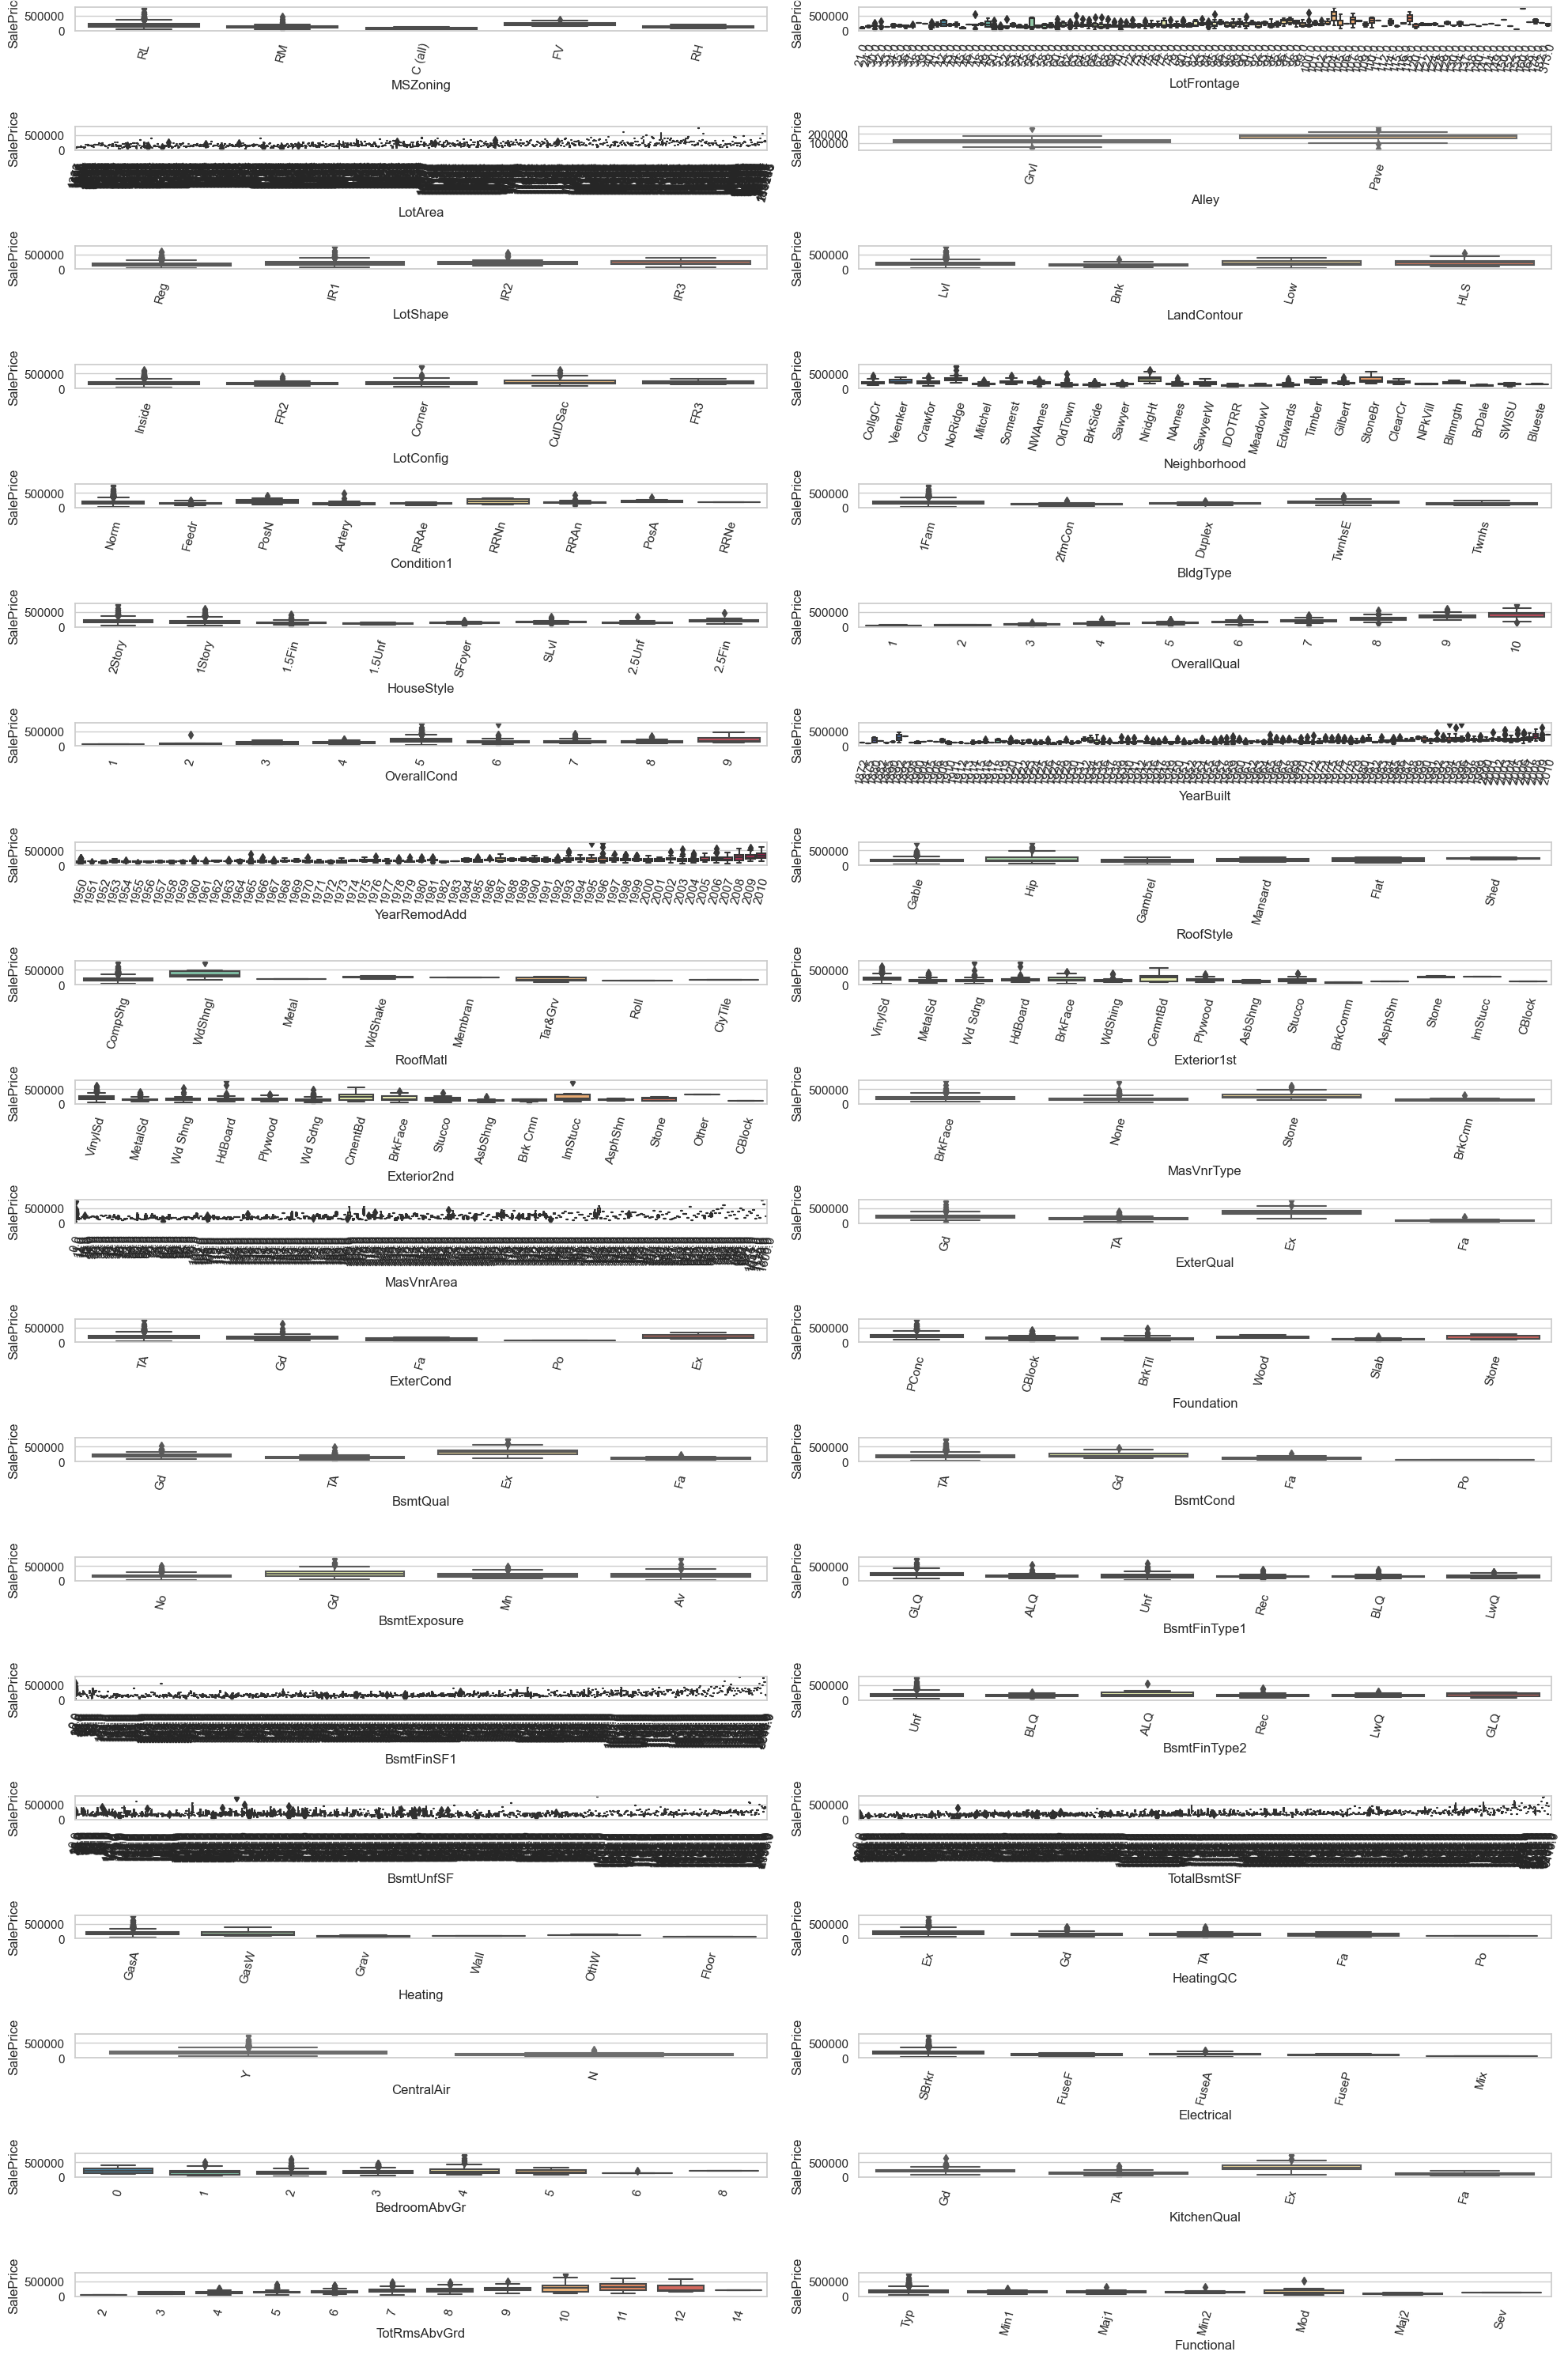

In [38]:
fig, axes = plt.subplots(
    round(len(train.columns)/3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(train.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=train.columns[i], y="SalePrice", data=train, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [39]:
#Training of Model

import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train), len(valid_ds_pd)))

2073 examples in training, 846 examples in testing.


In [40]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Defining Models

model_lin = LinearRegression()
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"**** Regressor: {model} ****")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(model_lin.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lin), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lin), 4))

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "orange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
# Save the model results into lists
model_list.append(model_ridge.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge), 4))

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
# Define hyperparameters
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 10.0}
Best R² (train): 0.8861069668785968

model_ridge_opt = Ridge(alpha = ridge_cv.best_params_["alpha"])
model_ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = model_ridge_opt.predict(X_test)
print_score(y_test, y_pred_ridge_opt, "Ridge")

In [ ]:
# Save the model results into lists
model_list.append(model_ridge_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge_opt), 4))

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
scores_lasso = cross_val_score(model_lasso, X_train, y_train,
                                cv=5)

print("Mean scores (Lasso Model):\n", np.mean(scores_lasso))
print("Standard deviation of scores (Lasso Model):\n", np.std(scores_lasso))

In [ ]:
scores_lasso_mse = -1 * cross_val_score(model_lasso, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", scores_lasso_mse)
print("Mean MSE scores:", scores_lasso_mse.mean())

In [ ]:
# Prediction of House Prices using the Optimal Lasso Regression Model

y_pred = np.exp(model_xgb_opt.predict(df_test_new))

output = pd.DataFrame({"Id": Id_test_list,"SalePrice": y_pred})

y_pred

In [ ]:
# Save the output
output.to_csv("submission5.csv", index=False)
output.head(10)